In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
import keras
import gc
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU
from keras import optimizers,regularizers
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
import time
from datetime import datetime, timedelta
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize

files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
#files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
     
prices=list()
sentiment=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/intrinioDatasetUpdated/Sentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    #sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/intrinioDataset/SentimentFul/'+file+'.csv')
    #price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDataset/indexes'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price['Unnamed: 0'] = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in price['Unnamed: 0']]
    price['Unnamed: 0'] = [row-timedelta(hours=8) for row in price['Unnamed: 0']]
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    print(sentimentVector[0:10])
    print(price[0:10])
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector=np.concatenate((sentimentVector,sentimentVector.rolling(5).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(10).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(15).mean()),axis=1)
    meanvector=np.concatenate((meanvector,sentimentVector.rolling(20).mean()),axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    sentiment.append(meanvector)
    prices.append(price)

/home/andrea/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00         0.000      0.000     0.000   
1           2  2017-08-14 14:00:00         0.000      0.000     0.000   
2           3  2017-08-14 14:15:00         0.000      0.000     1.000   
3           4  2017-08-14 14:30:00         0.000      0.000     1.000   
4           5  2017-08-14 14:45:00         0.250      0.250     1.250   
5           6  2017-08-14 15:00:00         1.125      0.625     1.125   
6           7  2017-08-14 15:15:00         1.125      1.625     3.125   
7           8  2017-08-14 15:30:00         1.125      1.625     3.125   
8           9  2017-08-14 15:45:00         1.125      1.625     4.125   
9          10  2017-08-14 16:00:00         1.125      1.625     4.125   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0        0.000          0.0         0.00         0  
1       0.0        0.000          0.0         0.00         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        1.0       5.0   
9          10  2017-08-14 16:00:00           0.0        1.0       5.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00      0.000000   0.000000  0.000000   
1           2  2017-08-14 14:00:00      0.000000   0.000000  0.000000   
2           3  2017-08-14 14:15:00      0.000000   0.000000  0.000000   
3           4  2017-08-14 14:30:00      0.000000   0.000000  0.000000   
4           5  2017-08-14 14:45:00      0.333333   0.333333  1.666667   
5           6  2017-08-14 15:00:00      0.333333   0.333333  1.666667   
6           7  2017-08-14 15:15:00      0.333333   0.333333  1.666667   
7           8  2017-08-14 15:30:00      0.333333   0.333333  1.666667   
8           9  2017-08-14 15:45:00      0.333333   0.333333  3.666667   
9          10  2017-08-14 16:00:00      0.333333   0.333333  3.666667   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0     0.000000          0.0          0.0         0  
1       0.0     0.000000          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       1.0   
2           3  2017-08-14 14:15:00           0.0        0.0       1.0   
3           4  2017-08-14 14:30:00           0.0        0.0       1.0   
4           5  2017-08-14 14:45:00           0.0        0.0       1.0   
5           6  2017-08-14 15:00:00           0.0        0.0       1.0   
6           7  2017-08-14 15:15:00           0.0        0.0       1.0   
7           8  2017-08-14 15:30:00           0.0        0.0       1.0   
8           9  2017-08-14 15:45:00           0.0        0.0       1.0   
9          10  2017-08-14 16:00:00           0.0        0.0       1.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         1  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0   0.000000       0.0   
1           2  2017-08-14 14:00:00           0.0   0.000000       0.0   
2           3  2017-08-14 14:15:00           0.0   0.000000       0.0   
3           4  2017-08-14 14:30:00           0.0   0.000000       0.0   
4           5  2017-08-14 14:45:00           0.0   0.000000       1.0   
5           6  2017-08-14 15:00:00           0.0   0.000000       1.0   
6           7  2017-08-14 15:15:00           0.0   0.000000       1.0   
7           8  2017-08-14 15:30:00           0.0   0.000000       1.0   
8           9  2017-08-14 15:45:00           0.0   0.333333       2.0   
9          10  2017-08-14 16:00:00           0.0   0.333333       2.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0  0.000000          0.0          0.0     0.000000         0  
1  0.000000          0.0          0.0     0.000000         0  
2  0.00

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        0.0       0.0   
7           8  2017-08-14 15:30:00           0.0        0.0       0.0   
8           9  2017-08-14 15:45:00           0.0        0.0       0.0   
9          10  2017-08-14 16:00:00           0.0        0.0       0.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

   Unnamed: 0             initTime  CONSTRAINING  LITIGIOUS  NEGATIVE  \
0           1  2017-08-14 13:45:00           0.0        0.0       0.0   
1           2  2017-08-14 14:00:00           0.0        0.0       0.0   
2           3  2017-08-14 14:15:00           0.0        0.0       0.0   
3           4  2017-08-14 14:30:00           0.0        0.0       0.0   
4           5  2017-08-14 14:45:00           0.0        0.0       0.0   
5           6  2017-08-14 15:00:00           0.0        0.0       0.0   
6           7  2017-08-14 15:15:00           0.0        1.0       2.0   
7           8  2017-08-14 15:30:00           0.0        1.0       2.0   
8           9  2017-08-14 15:45:00           0.0        2.0       3.0   
9          10  2017-08-14 16:00:00           0.0        2.0       3.0   

   POSITIVE  UNCERTAINTY  SUPERFLUOUS  INTERESTING  NUM_NEWS  
0       0.0          0.0          0.0          0.0         0  
1       0.0          0.0          0.0          0.0         0  
2      

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
                    

In [3]:
def buildModel(l,n,d,le):
    opt=optimizers.Adam(lr=le)
    model = Sequential()  
    model.add(Dense(n, input_dim=151,activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU()) 
    model.add(Dropout(d))
    model.add(Dense(math.floor(n/2), activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Dropout(d))
    model.add(Dense(math.floor(n/4), activity_regularizer=regularizers.l2(l))) 
    model.add(BatchNormalization()) 
    model.add(LeakyReLU()) 
    model.add(Dense(1, activation='sigmoid')) 
    
    model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

    return model
def reset_weights(model):
    session=K.get_session()
    for layer in model.layers:
        if(hasattr(layer,'kernel_initializer')):
            layer.kernel.initializer.run(session=session)
            
           

Working on... AAPL
15.571701720841297
0.005338458253266777
working on d,u and l,le 0.5 64 0.01 0.001


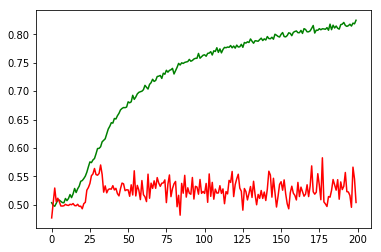

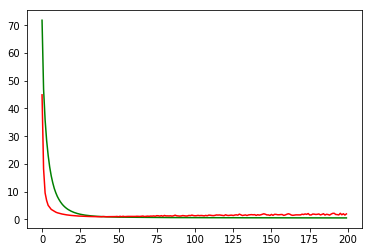

working on d,u and l,le 0.5 64 0.01 0.0001


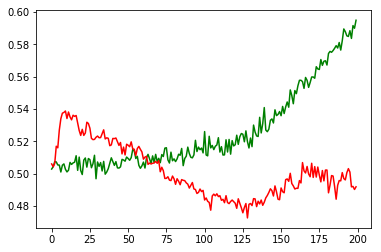

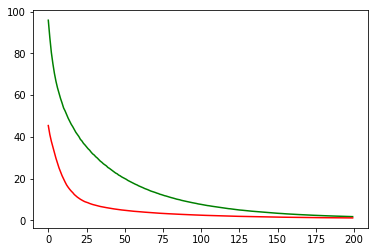

working on d,u and l,le 0.5 128 0.01 0.001


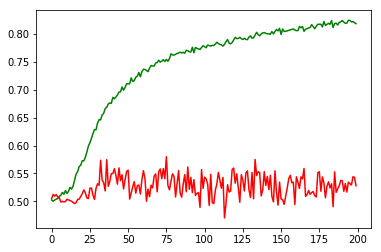

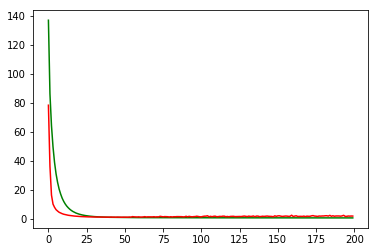

working on d,u and l,le 0.5 128 0.01 0.0001


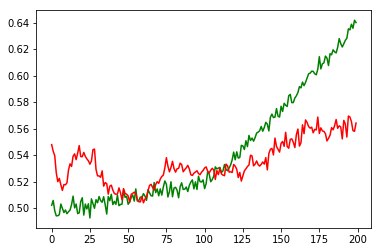

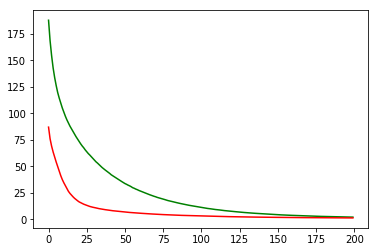

working on d,u and l,le 0.5 256 0.01 0.001


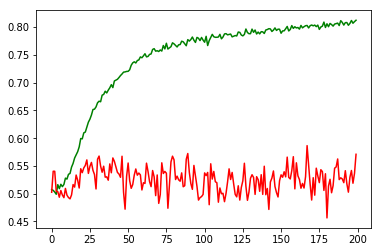

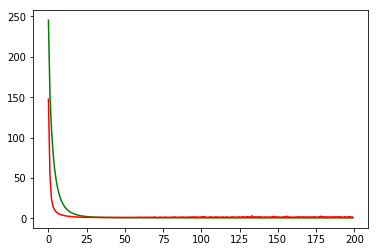

working on d,u and l,le 0.5 256 0.01 0.0001


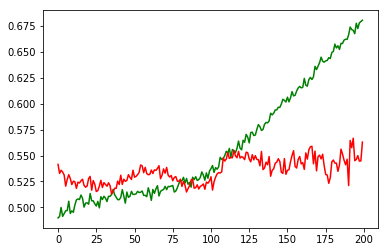

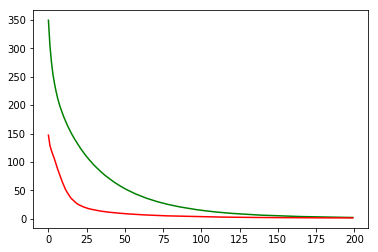

maxd,maxu,maxl,maxle: 0.5 256 0.01 0.001
Chart for BEST MODEL FOR: AAPL


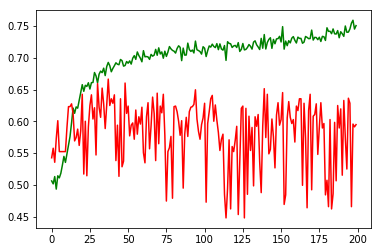

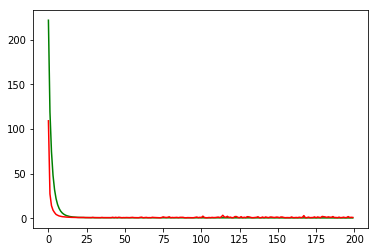

F1,score 0.6774647887323945
G-score: 0.5394133225485068
Accuracy 0.5946902677021195
Window: 140
[[191 315]
 [143 481]]
Vol pos 3.823873374581594
Vol neg 2.2207325641555418
Real Percentage of gain: 93.52950425299863
Percentage of gain: 1.3739357463146844
Total gain: 1552.5473933355934
000000000000000000000000000000000000000000000000
Percentile:  0
[[162 216]
 [134 241]]
753/753 [==============================] - 0s 24us/step
[1.0987147819473448, 0.5351925632788999]
Percentile:  1
[[18 50]
 [ 9 75]]
152/152 [==============================] - 0s 28us/step
[1.2694232526578402, 0.6118421052631579]
Percentile:  2
[[11 49]
 [ 0 79]]
139/139 [==============================] - 0s 37us/step
[0.7008620946527385, 0.6474820143884892]
Percentile:  3
[[49]]
49/49 [==============================] - 0s 36us/step
[0.1302263108747346, 1.0]
Percentile:  4
[[35]]
35/35 [==============================] - 0s 49us/step
[0.10776423897062029, 1.0]
000000000000000000000000000000000000000000000000
Working on... A

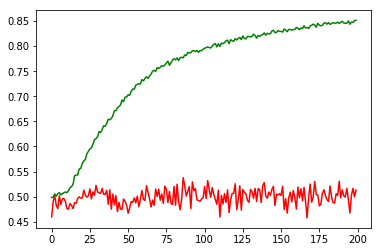

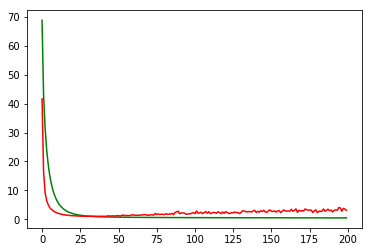

working on d,u and l,le 0.5 64 0.01 0.0001


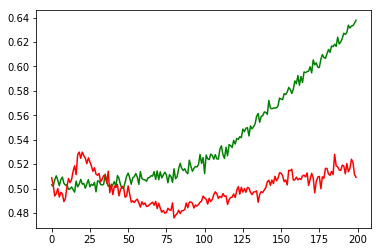

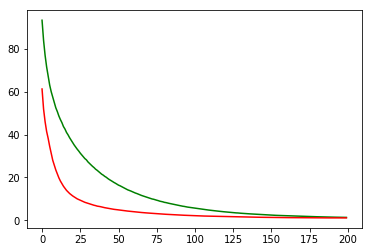

working on d,u and l,le 0.5 128 0.01 0.001


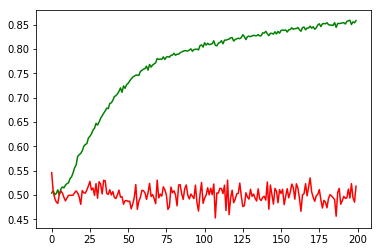

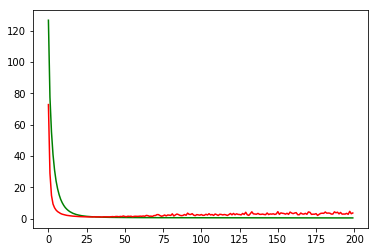

working on d,u and l,le 0.5 128 0.01 0.0001


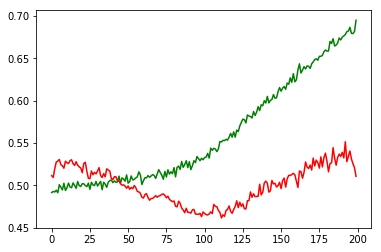

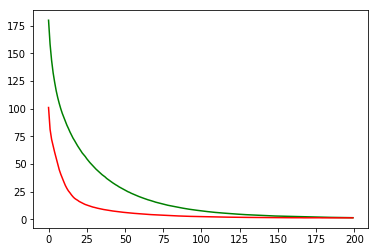

working on d,u and l,le 0.5 256 0.01 0.001


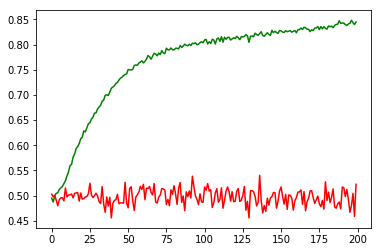

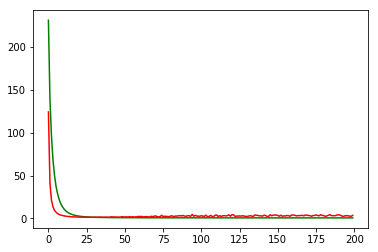

working on d,u and l,le 0.5 256 0.01 0.0001


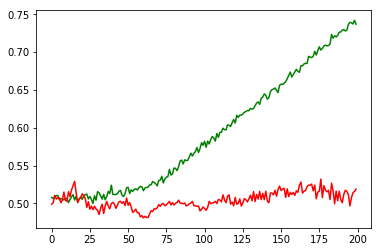

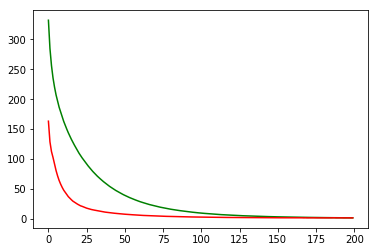

maxd,maxu,maxl,maxle: 0.5 256 0.01 0.001
Chart for BEST MODEL FOR: AMZN


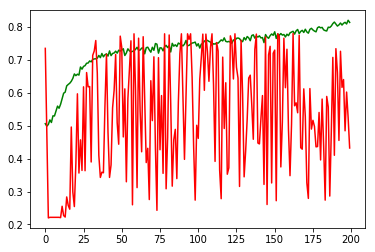

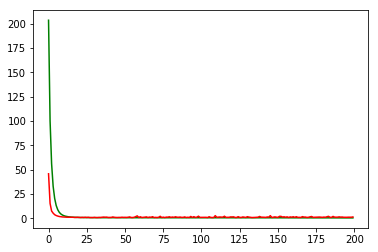

F1,score 0.5309992706053976
G-score: 0.45360818596813895
Accuracy 0.43197879900780667
Window: 140
[[125 126]
 [517 364]]
Vol pos 2.1560979768952513
Vol neg 2.520246964693794
Real Percentage of gain: -23.585788896191104
Percentage of gain: -0.5001650950497629
Total gain: -566.1868875963316
000000000000000000000000000000000000000000000000
Percentile:  0
[[114  85]
 [263 168]]
630/630 [==============================] - 0s 37us/step
[1.3858749771875047, 0.4476190479974898]
Percentile:  1
[[  4  32]
 [189 160]]
385/385 [==============================] - 0s 31us/step
[1.3731216514065814, 0.42597402597402595]
Percentile:  2
[[ 7  9]
 [27 33]]
76/76 [==============================] - 0s 47us/step
[1.0747698733681126, 0.5263157902579558]
Percentile:  3
[[ 0  0]
 [31  2]]
33/33 [==============================] - 0s 62us/step
[1.9299712831323796, 0.06060606060606061]
Percentile:  4
[[0 0]
 [6 0]]
6/6 [==============================] - 0s 92us/step
[2.5630834102630615, 0.0]
00000000000000000000000

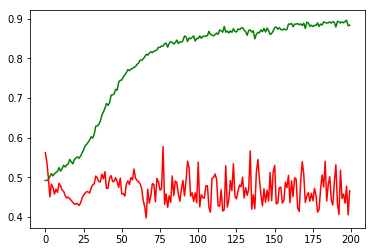

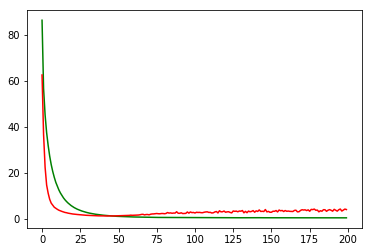

working on d,u and l,le 0.5 64 0.01 0.0001


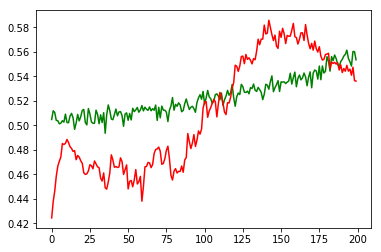

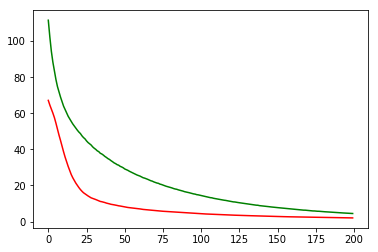

working on d,u and l,le 0.5 128 0.01 0.001


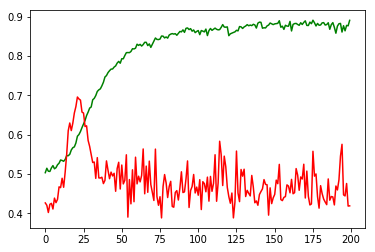

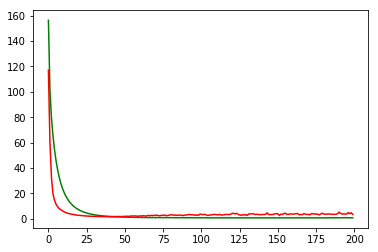

working on d,u and l,le 0.5 128 0.01 0.0001


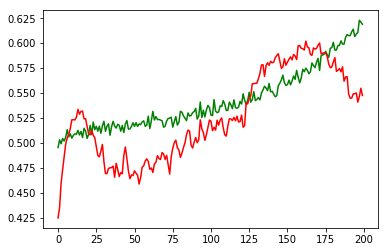

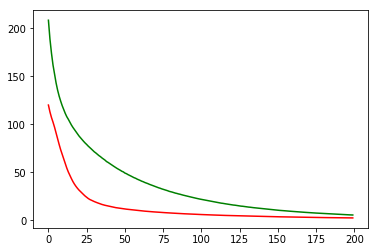

working on d,u and l,le 0.5 256 0.01 0.001


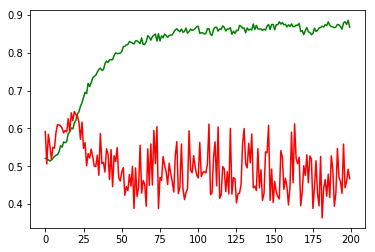

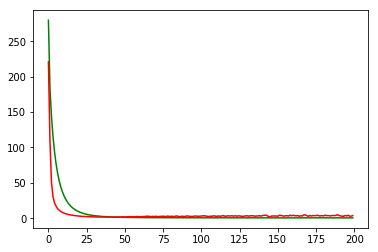

working on d,u and l,le 0.5 256 0.01 0.0001


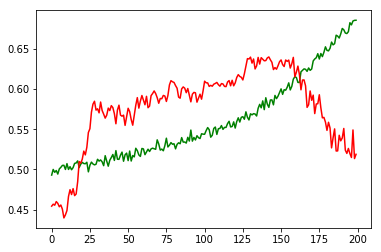

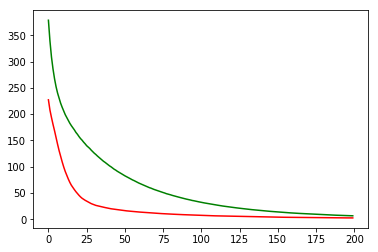

maxd,maxu,maxl,maxle: 0.5 128 0.01 0.0001
Chart for BEST MODEL FOR: PEP


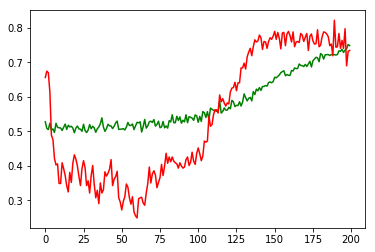

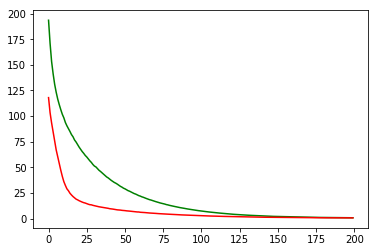

F1,score 0.8295566502463055
G-score: 0.6862206234973048
Accuracy 0.7342549923195084
Window: 140
[[ 57  34]
 [139 421]]
Vol pos 2.388298289565628
Vol neg 1.237140462765454
Real Percentage of gain: 81.22657716305103
Percentage of gain: 1.424856040482253
Total gain: 927.5812823539468
000000000000000000000000000000000000000000000000
Percentile:  0
[[41 31]
 [37 73]]
182/182 [==============================] - 0s 33us/step
[0.7443996536862719, 0.6263736268648734]
Percentile:  1
[[16  3]
 [79 63]]
161/161 [==============================] - 0s 29us/step
[0.8037629134906745, 0.4906832298136646]
Percentile:  2
[[  0   0]
 [ 22 164]]
186/186 [==============================] - 0s 26us/step
[0.4040996041349185, 0.8817204320302574]
Percentile:  3
[[76]]
76/76 [==============================] - 0s 35us/step
[0.20535455487276377, 1.0]
Percentile:  4
[[45]]
45/45 [==============================] - 0s 53us/step
[0.142627125316196, 1.0]
000000000000000000000000000000000000000000000000
Working on... GOOGL

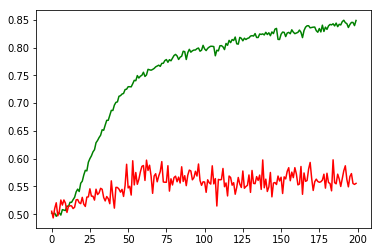

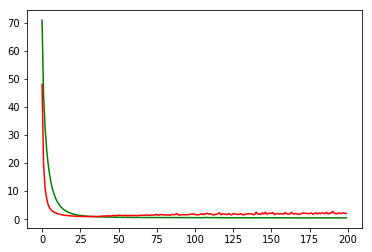

working on d,u and l,le 0.5 64 0.01 0.0001


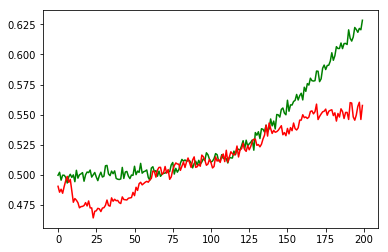

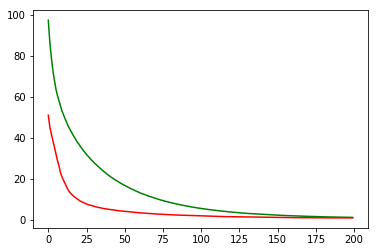

working on d,u and l,le 0.5 128 0.01 0.001


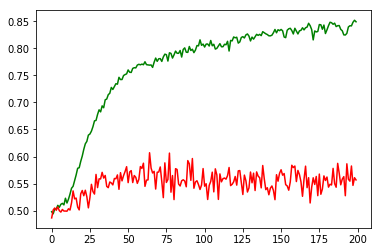

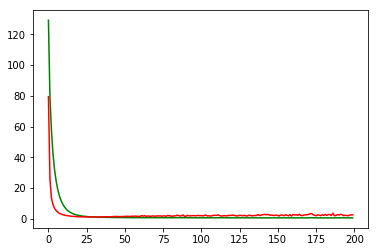

working on d,u and l,le 0.5 128 0.01 0.0001


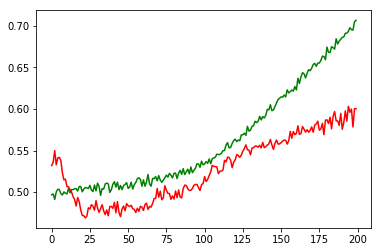

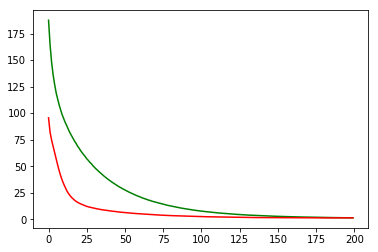

working on d,u and l,le 0.5 256 0.01 0.001


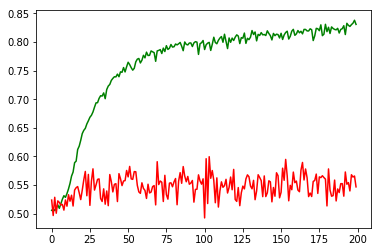

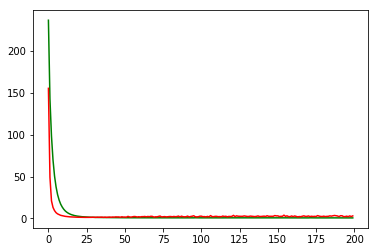

working on d,u and l,le 0.5 256 0.01 0.0001


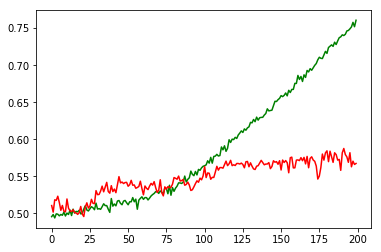

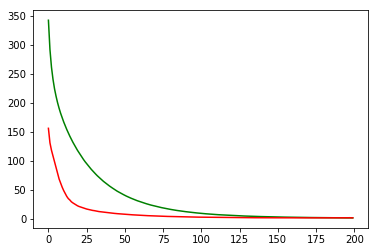

maxd,maxu,maxl,maxle: 0.5 128 0.01 0.0001
Chart for BEST MODEL FOR: GOOGL


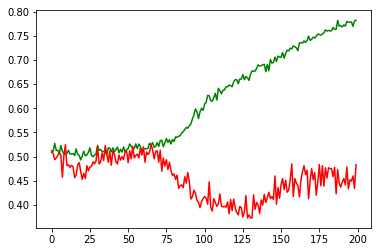

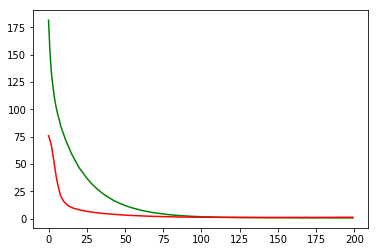

F1,score 0.5749636098981077
G-score: 0.44068618562908707
Accuracy 0.48318583981125757
Window: 140
[[151 304]
 [280 395]]
Vol pos 3.2901521779693006
Vol neg 2.6422212299780834
Real Percentage of gain: -7.587977955071106
Percentage of gain: 0.22421760253454648
Total gain: 253.3658908640375
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 82 150]
 [ 85  94]]
411/411 [==============================] - 0s 23us/step
[1.0969468131842695, 0.4282238438834239]
Percentile:  1
[[ 29  82]
 [107 145]]
363/363 [==============================] - 0s 24us/step
[1.0316542597184826, 0.4793388430573067]
Percentile:  2
[[37 60]
 [50 59]]
206/206 [==============================] - 0s 28us/step
[1.133795129442678, 0.4660194177650711]
Percentile:  3
[[ 2 12]
 [33 54]]
101/101 [==============================] - 0s 35us/step
[1.0652560060567196, 0.5544554467248445]
Percentile:  4
[[ 0  0]
 [ 5 42]]
47/47 [==============================] - 0s 41us/step
[0.37660839963466564, 0.8936170250811475]
0

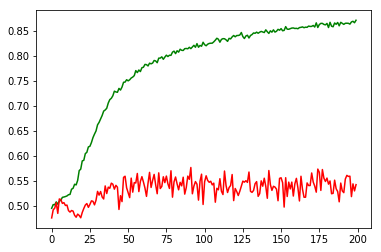

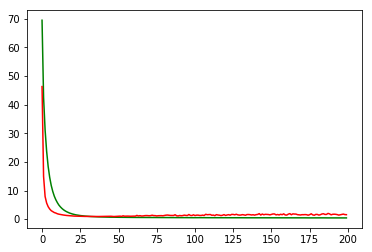

working on d,u and l,le 0.5 64 0.01 0.0001


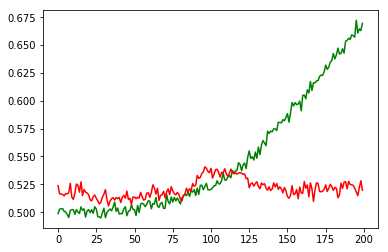

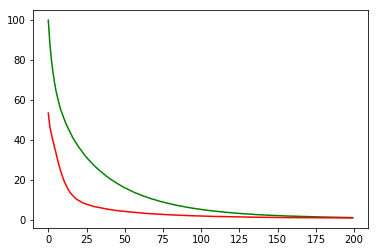

working on d,u and l,le 0.5 128 0.01 0.001


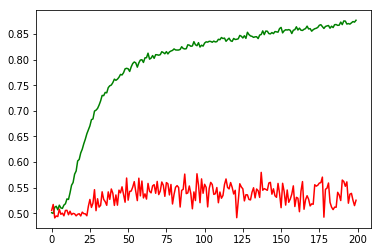

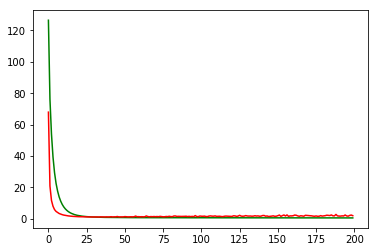

working on d,u and l,le 0.5 128 0.01 0.0001


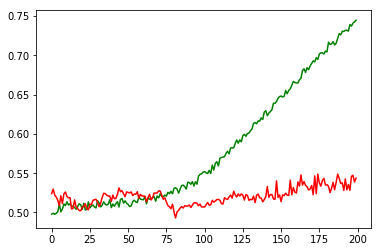

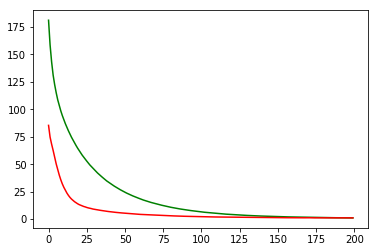

working on d,u and l,le 0.5 256 0.01 0.001


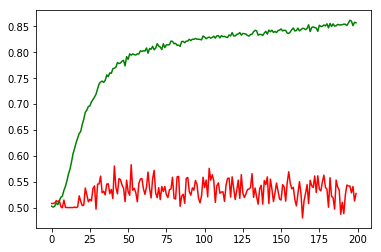

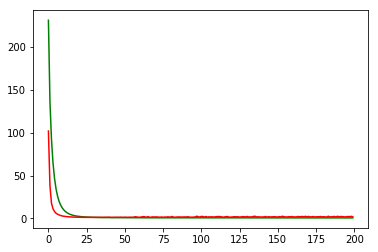

working on d,u and l,le 0.5 256 0.01 0.0001


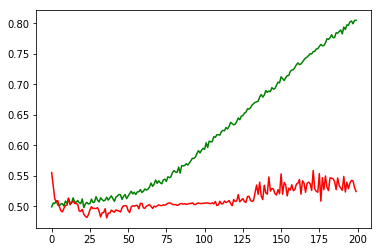

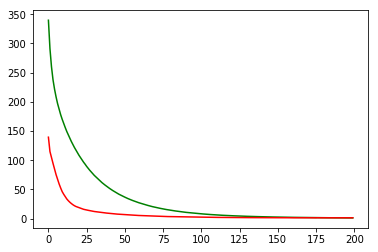

maxd,maxu,maxl,maxle: 0.5 128 0.01 0.0001
Chart for BEST MODEL FOR: MSFT


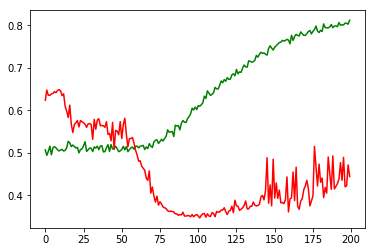

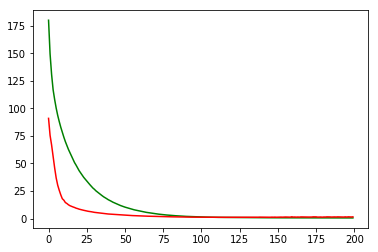

F1,score 0.45674740484429066
G-score: 0.4592494344032533
Accuracy 0.44424778655567
Window: 140
[[238 181]
 [447 264]]
Vol pos 1.3444211957271686
Vol neg 1.759514352304169
Real Percentage of gain: -0.7678962920599444
Percentage of gain: -0.3805978522052916
Total gain: -430.07557299197947
000000000000000000000000000000000000000000000000
Percentile:  0
[[182 110]
 [151 101]]
544/544 [==============================] - 0s 31us/step
[1.1775928560425253, 0.5202205882352942]
Percentile:  1
[[ 42  32]
 [148  91]]
313/313 [==============================] - 0s 36us/step
[1.1745701201807577, 0.4249201282716026]
Percentile:  2
[[10 13]
 [96 44]]
163/163 [==============================] - 0s 39us/step
[1.536764588824079, 0.3312883435582822]
Percentile:  3
[[ 3 17]
 [42 19]]
81/81 [==============================] - 0s 48us/step
[2.734802524248759, 0.2716049382716049]
Percentile:  4
[[ 1  9]
 [10  8]]
28/28 [==============================] - 0s 30us/step
[3.6892082691192627, 0.3214285671710968]
000000

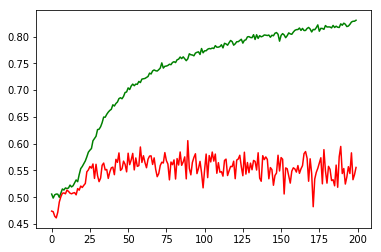

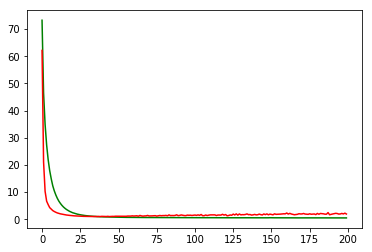

working on d,u and l,le 0.5 64 0.01 0.0001


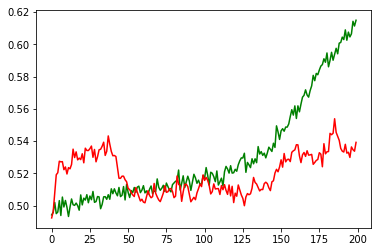

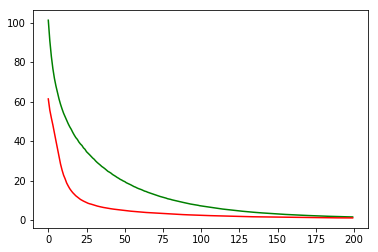

working on d,u and l,le 0.5 128 0.01 0.001


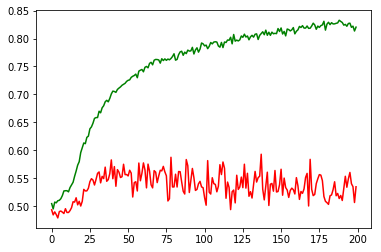

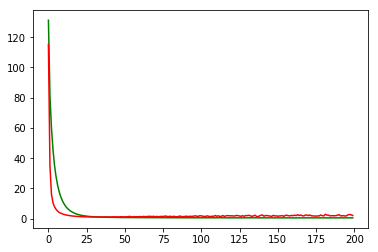

working on d,u and l,le 0.5 128 0.01 0.0001


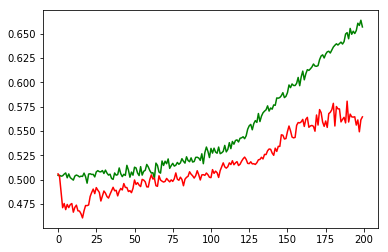

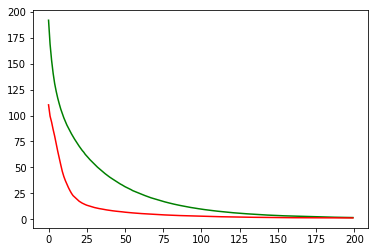

working on d,u and l,le 0.5 256 0.01 0.001


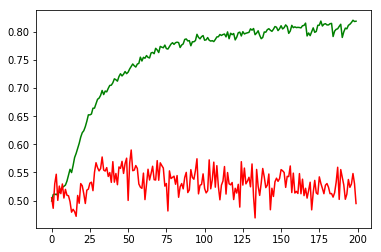

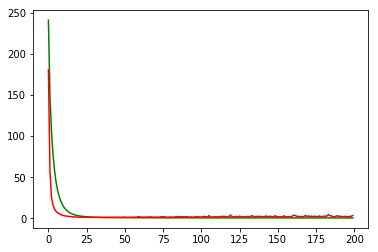

working on d,u and l,le 0.5 256 0.01 0.0001


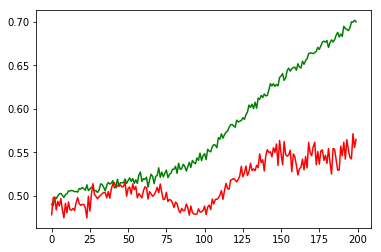

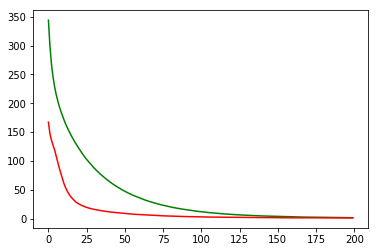

maxd,maxu,maxl,maxle: 0.5 256 0.01 0.0001
Chart for BEST MODEL FOR: FB


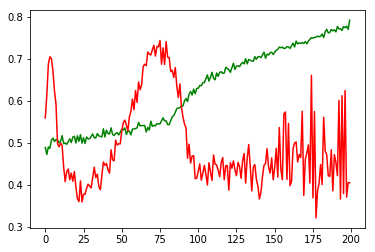

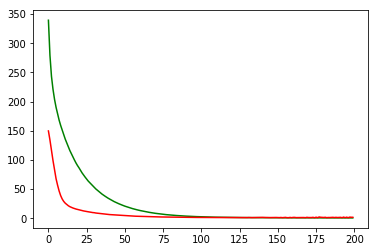

F1,score 0.4118673647469459
G-score: 0.4787896197408204
Accuracy 0.4045936395759717
Window: 140
[[222  41]
 [633 236]]
Vol pos 3.190664493850914
Vol neg 3.000887034710989
Real Percentage of gain: -125.86697273467887
Percentage of gain: -0.4958246671479574
Total gain: -561.2735232114878
000000000000000000000000000000000000000000000000
Percentile:  0
[[200  12]
 [275  35]]
522/522 [==============================] - 0s 34us/step
[1.4969914292923792, 0.4501915708812261]
Percentile:  1
[[ 14  23]
 [302 129]]
468/468 [==============================] - 0s 36us/step
[1.7118327495379326, 0.3055555555555556]
Percentile:  2
[[ 7  6]
 [56 36]]
105/105 [==============================] - 0s 43us/step
[1.2642964499337332, 0.4095238095947674]
Percentile:  3
[[14]]
14/14 [==============================] - 0s 45us/step
[0.19007864594459534, 1.0]
Percentile:  4
[[21]]
21/21 [==============================] - 0s 41us/step
[0.1256343126296997, 1.0]
000000000000000000000000000000000000000000000000
Working o

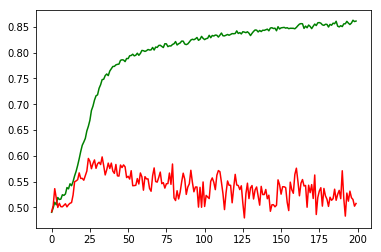

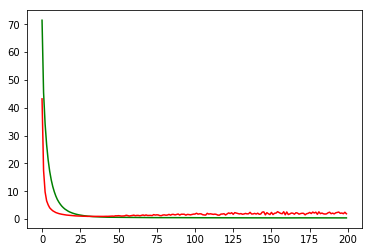

working on d,u and l,le 0.5 64 0.01 0.0001


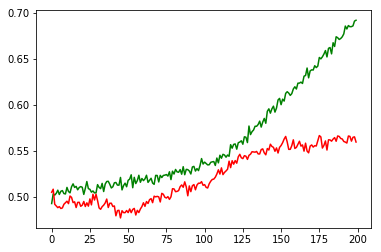

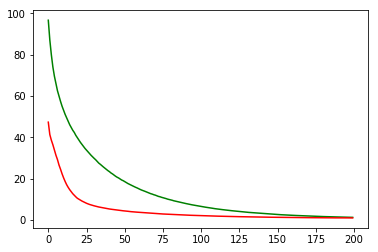

working on d,u and l,le 0.5 128 0.01 0.001


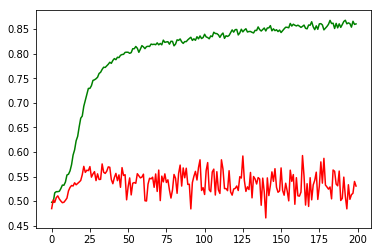

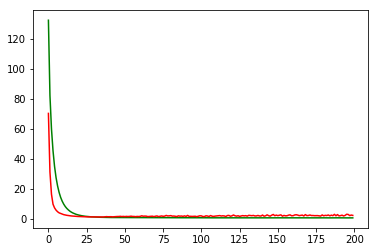

working on d,u and l,le 0.5 128 0.01 0.0001


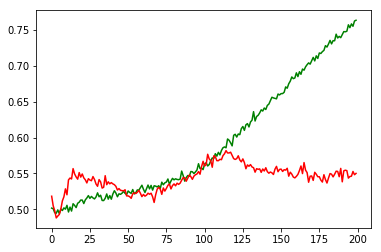

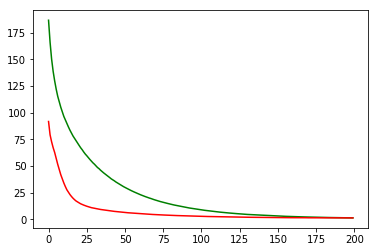

working on d,u and l,le 0.5 256 0.01 0.001


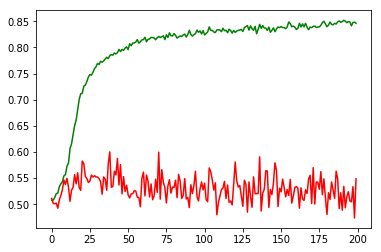

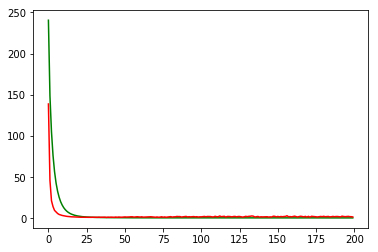

working on d,u and l,le 0.5 256 0.01 0.0001


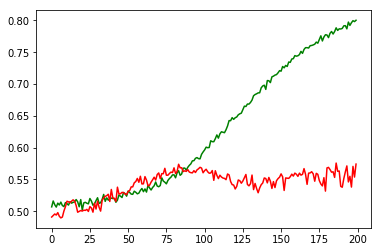

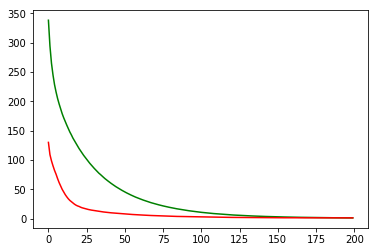

maxd,maxu,maxl,maxle: 0.5 256 0.01 0.0001
Chart for BEST MODEL FOR: INTC


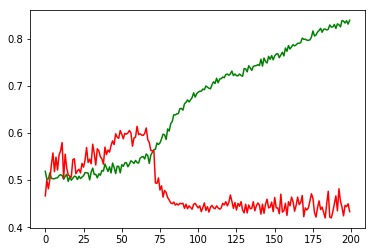

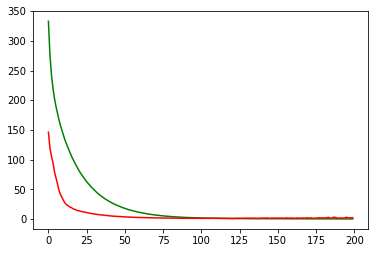

F1,score 0.13941018766756033
G-score: 0.27262876059351643
Accuracy 0.43286218849593255
Window: 140
[[438  10]
 [632  52]]
Vol pos 2.6604734067580056
Vol neg 2.078434863025022
Real Percentage of gain: -91.32291252290412
Percentage of gain: -0.02714064730622005
Total gain: -30.7232127506411
000000000000000000000000000000000000000000000000
Percentile:  0
[[107   9]
 [229   9]]
354/354 [==============================] - 0s 46us/step
[3.3920190199620306, 0.327683615819209]
Percentile:  1
[[113   1]
 [211  17]]
342/342 [==============================] - 0s 41us/step
[2.6383048513827965, 0.38011695906432746]
Percentile:  2
[[127   0]
 [125  26]]
278/278 [==============================] - 0s 47us/step
[2.108865043134998, 0.5503597122302158]
Percentile:  3
[[63  0]
 [51  0]]
114/114 [==============================] - 0s 54us/step
[1.6976640709398085, 0.5526315789473685]
Percentile:  4
[[28  0]
 [14  0]]
42/42 [==============================] - 0s 83us/step
[0.9506074115633965, 0.666666666666666

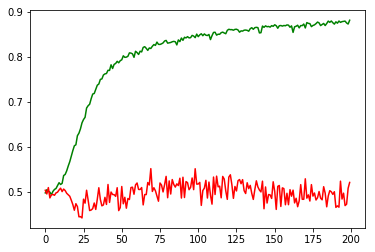

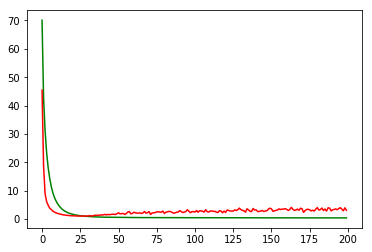

working on d,u and l,le 0.5 64 0.01 0.0001


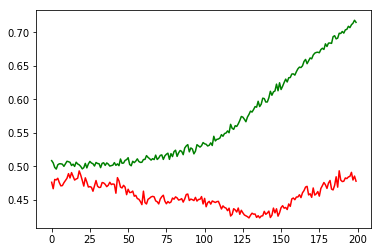

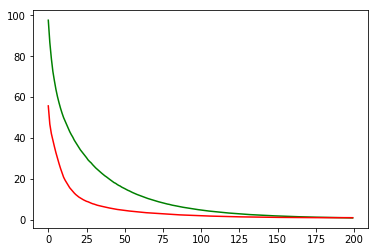

working on d,u and l,le 0.5 128 0.01 0.001


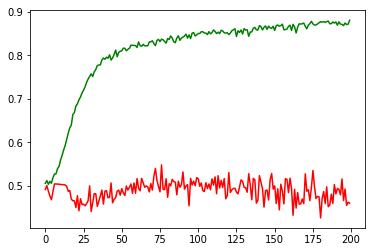

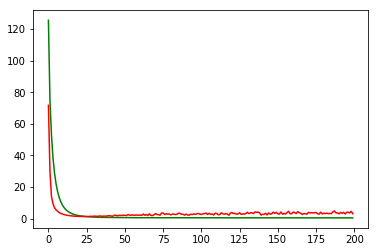

working on d,u and l,le 0.5 128 0.01 0.0001


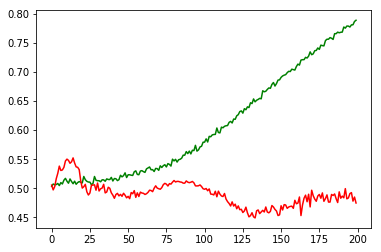

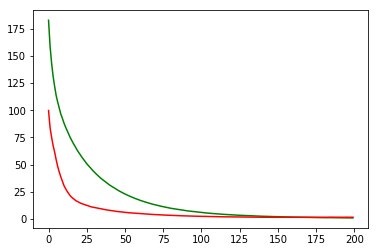

working on d,u and l,le 0.5 256 0.01 0.001


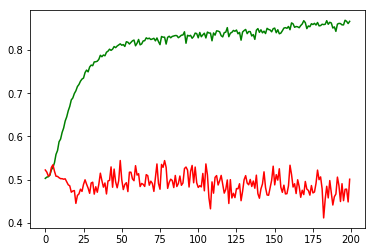

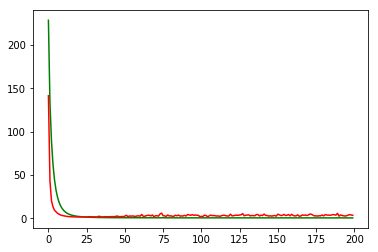

working on d,u and l,le 0.5 256 0.01 0.0001


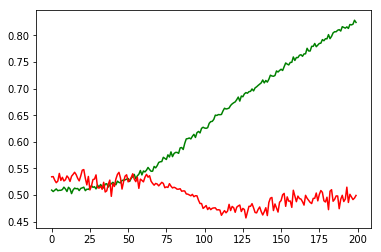

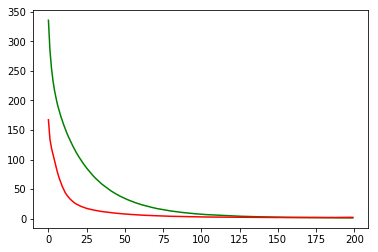

maxd,maxu,maxl,maxle: 0.5 64 0.01 0.001
Chart for BEST MODEL FOR: CSCO


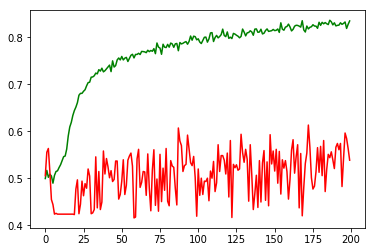

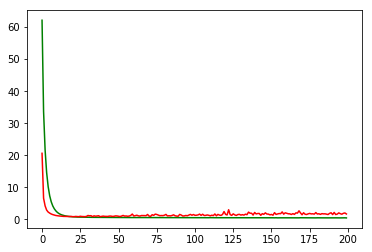

F1,score 0.5678601165695253
G-score: 0.5406963452094975
Accuracy 0.5386666673554314
Window: 140
[[265 212]
 [307 341]]
Vol pos 2.1423076239907384
Vol neg 1.490515599291822
Real Percentage of gain: 48.96686784861049
Percentage of gain: 0.4663651769830505
Total gain: 524.6608241059319
000000000000000000000000000000000000000000000000
Percentile:  0
[[101 119]
 [152 144]]
516/516 [==============================] - 0s 28us/step
[2.066219167191853, 0.4748062015503876]
Percentile:  1
[[ 31  65]
 [ 97 130]]
323/323 [==============================] - 0s 31us/step
[1.5756049916471122, 0.4984520123839009]
Percentile:  2
[[41  9]
 [39 49]]
138/138 [==============================] - 0s 34us/step
[0.6801285951033883, 0.6521739132594371]
Percentile:  3
[[44 14]
 [15 13]]
86/86 [==============================] - 0s 31us/step
[0.9527474773484607, 0.662790693515955]
Percentile:  4
[[47  5]
 [ 3  3]]
58/58 [==============================] - 0s 41us/step
[0.584311633274473, 0.8620689696279066]
00000000000

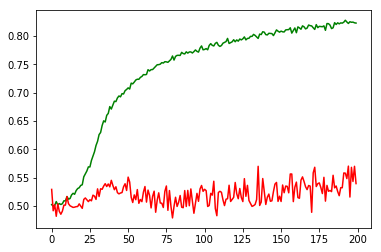

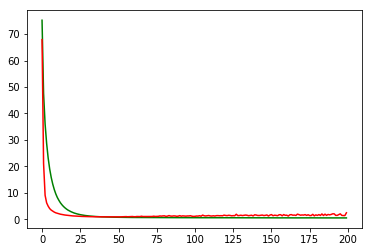

working on d,u and l,le 0.5 64 0.01 0.0001


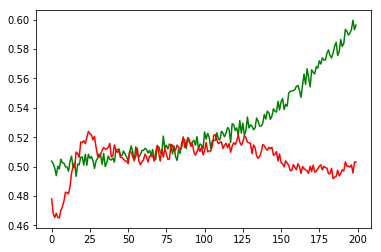

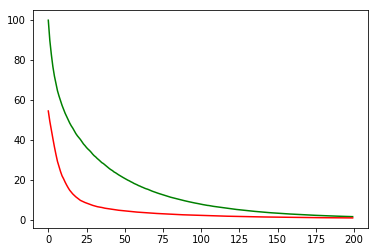

working on d,u and l,le 0.5 128 0.01 0.001


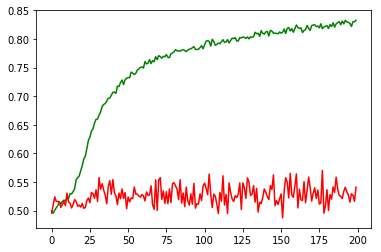

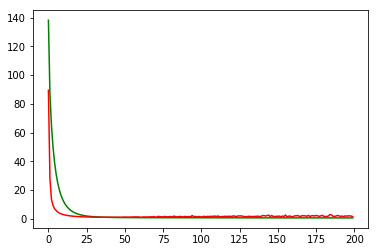

working on d,u and l,le 0.5 128 0.01 0.0001


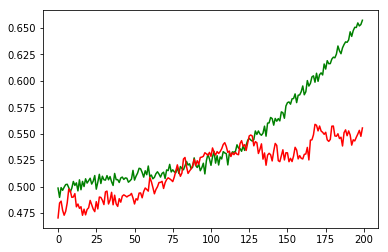

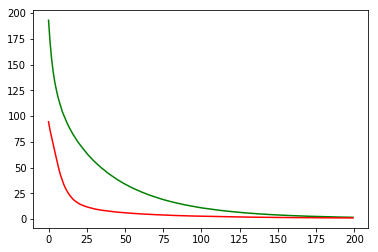

working on d,u and l,le 0.5 256 0.01 0.001


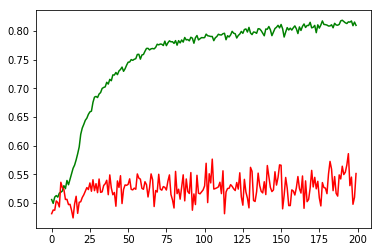

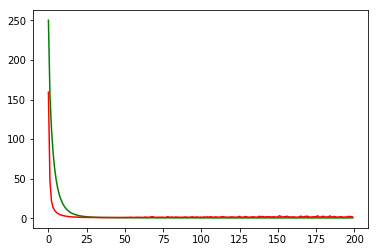

working on d,u and l,le 0.5 256 0.01 0.0001


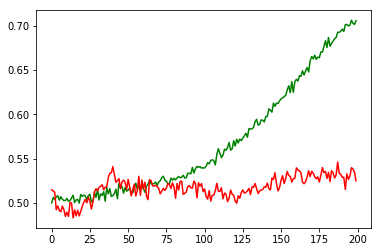

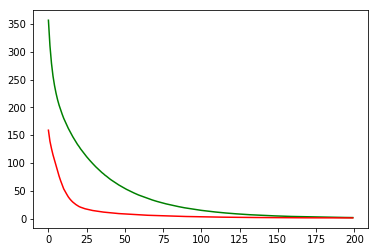

maxd,maxu,maxl,maxle: 0.5 128 0.01 0.0001
Chart for BEST MODEL FOR: CMCSA


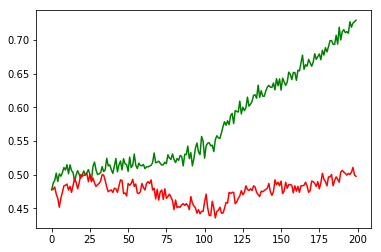

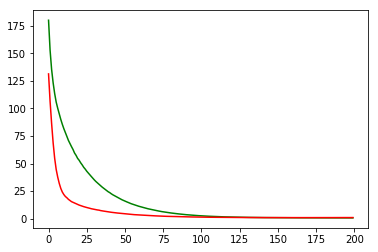

F1,score 0.4736355226641999
G-score: 0.4958284439661019
Accuracy 0.497349825427726
Window: 140
[[307 233]
 [336 256]]
Vol pos 2.823027600125256
Vol neg 2.8905054364610976
Real Percentage of gain: -20.771129967879613
Percentage of gain: -0.04888079017300842
Total gain: -55.33305447584553
000000000000000000000000000000000000000000000000
Percentile:  0
[[123 104]
 [114  87]]
428/428 [==============================] - 0s 30us/step
[0.899750656056627, 0.49065420560747663]
Percentile:  1
[[118  79]
 [159 145]]
501/501 [==============================] - 0s 31us/step
[0.8656081002867388, 0.5249501003952559]
Percentile:  2
[[21 21]
 [50 24]]
116/116 [==============================] - 0s 43us/step
[0.9138220343096503, 0.3879310365380912]
Percentile:  3
[[37 23]
 [12  0]]
72/72 [==============================] - 0s 51us/step
[0.7684579557842679, 0.5138888888888888]
Percentile:  4
[[8 5]
 [0 0]]
13/13 [==============================] - 0s 57us/step
[0.6644834876060486, 0.6153846383094788]
00000000

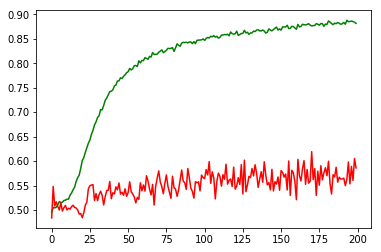

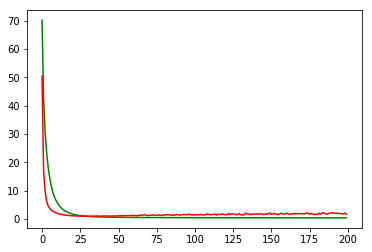

working on d,u and l,le 0.5 64 0.01 0.0001


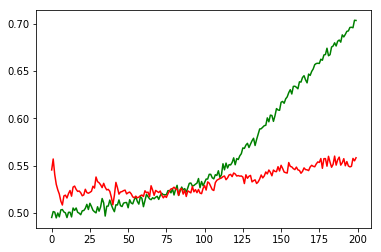

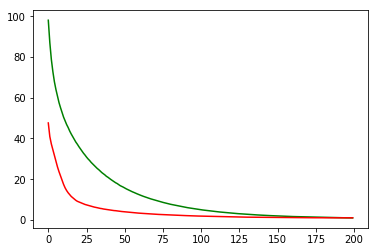

working on d,u and l,le 0.5 128 0.01 0.001


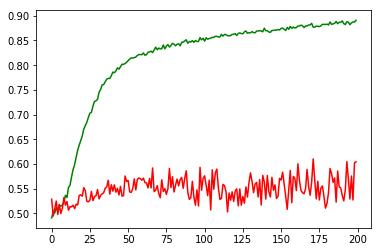

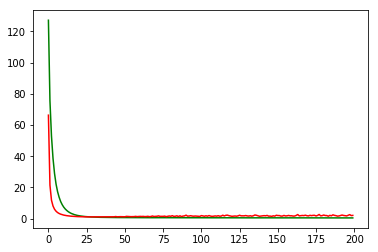

working on d,u and l,le 0.5 128 0.01 0.0001


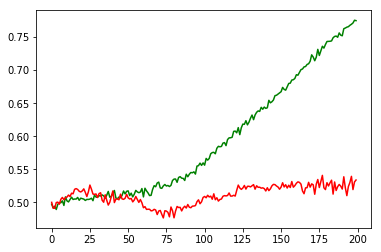

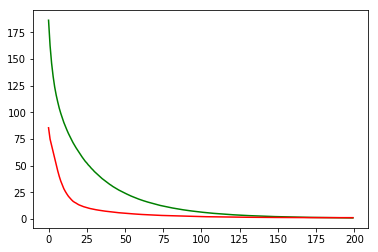

working on d,u and l,le 0.5 256 0.01 0.001


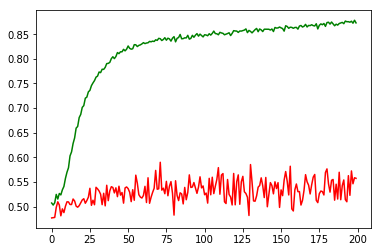

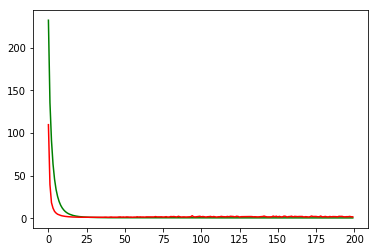

working on d,u and l,le 0.5 256 0.01 0.0001


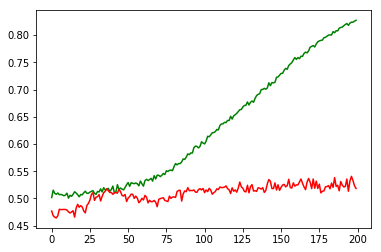

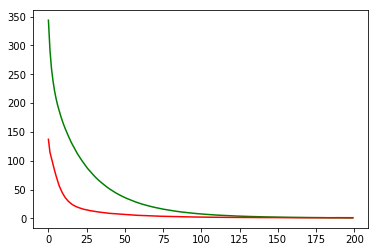

maxd,maxu,maxl,maxle: 0.5 128 0.01 0.001
Chart for BEST MODEL FOR: NVDA


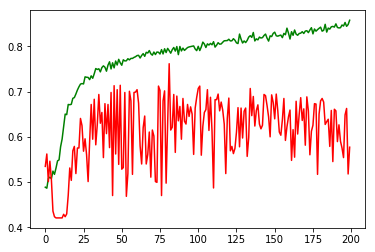

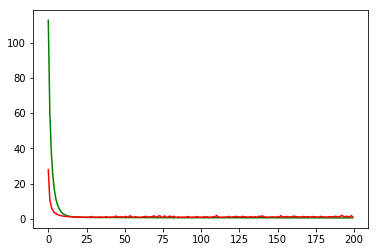

F1,score 0.4909670563230605
G-score: 0.5587362123129167
Accuracy 0.5768551238855287
Window: 140
[[422  54]
 [425 231]]
Vol pos 3.5510123535026605
Vol neg 4.0679733675778404
Real Percentage of gain: 215.0671162531704
Percentage of gain: 0.3270775828334379
Total gain: 370.2518237674517
000000000000000000000000000000000000000000000000
Percentile:  0
[[286  27]
 [184  62]]
559/559 [==============================] - 0s 30us/step
[1.0802245738254677, 0.6225402507671091]
Percentile:  1
[[102  15]
 [134  86]]
337/337 [==============================] - 0s 23us/step
[1.0219533714943894, 0.5578635014836796]
Percentile:  2
[[24  7]
 [46 26]]
103/103 [==============================] - 0s 41us/step
[1.168776232930063, 0.4854368937825694]
Percentile:  3
[[10  5]
 [42 23]]
80/80 [==============================] - 0s 30us/step
[1.0798339128494263, 0.4125]
Percentile:  4
[[ 0  0]
 [17 34]]
51/51 [==============================] - 0s 43us/step
[0.7509812803245058, 0.6666666690041038]
00000000000000000000

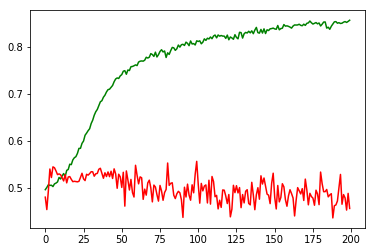

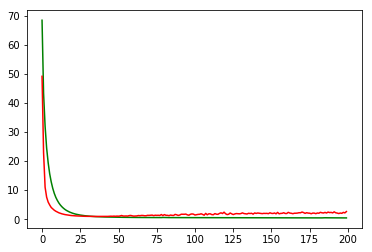

working on d,u and l,le 0.5 64 0.01 0.0001


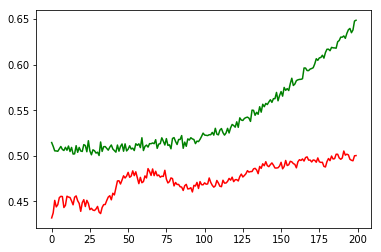

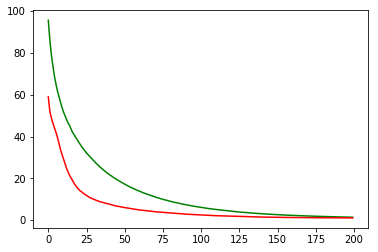

working on d,u and l,le 0.5 128 0.01 0.001


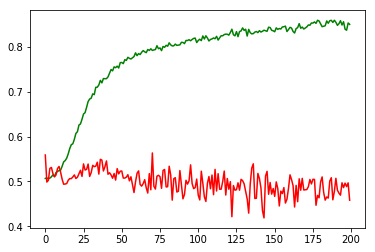

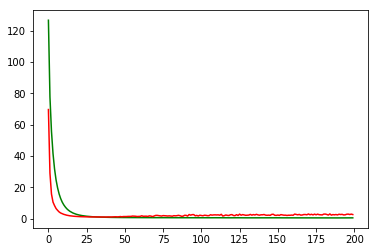

working on d,u and l,le 0.5 128 0.01 0.0001


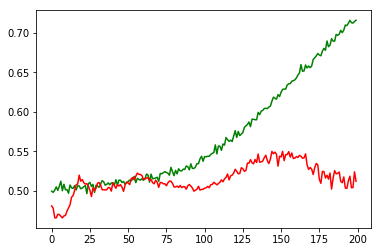

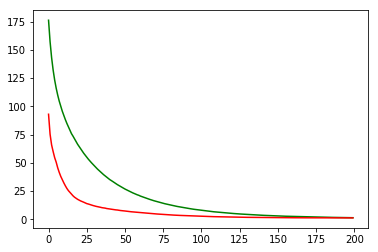

working on d,u and l,le 0.5 256 0.01 0.001


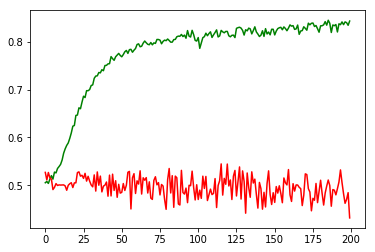

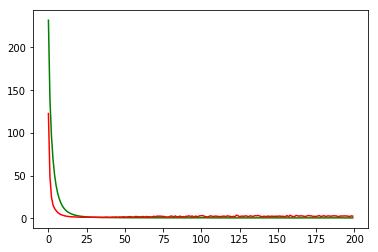

working on d,u and l,le 0.5 256 0.01 0.0001


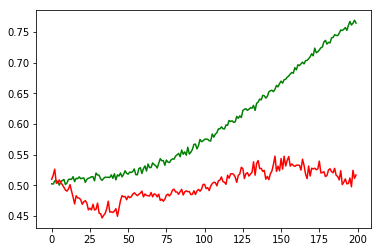

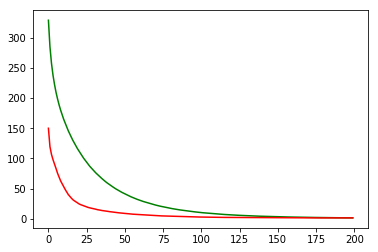

maxd,maxu,maxl,maxle: 0.5 256 0.01 0.0001
Chart for BEST MODEL FOR: NFLX


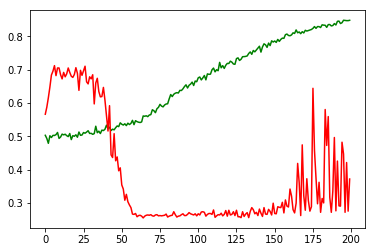

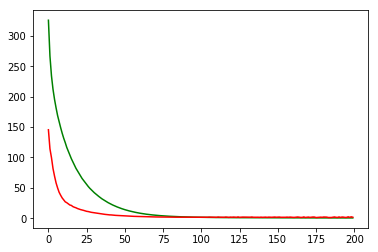

F1,score 0.43616177636796194
G-score: 0.40236603406783633
Accuracy 0.37190812720848054
Window: 140
[[146 151]
 [560 275]]
Vol pos 4.073934620242597
Vol neg 4.492234906671216
Real Percentage of gain: -156.8466862945338
Percentage of gain: -1.3064068405663438
Total gain: -1478.8525435211013
000000000000000000000000000000000000000000000000
Percentile:  0
[[109  61]
 [184 106]]
460/460 [==============================] - 0s 44us/step
[1.414867613626563, 0.46739130486612734]
Percentile:  1
[[ 18  42]
 [202  66]]
328/328 [==============================] - 0s 42us/step
[1.578699478288976, 0.25609756097560976]
Percentile:  2
[[  4  34]
 [137  58]]
233/233 [==============================] - 0s 40us/step
[1.6707841019773688, 0.26609442066481187]
Percentile:  3
[[13 14]
 [36 34]]
97/97 [==============================] - 0s 48us/step
[1.1817700196172773, 0.4845360824742268]
Percentile:  4
[[ 1  0]
 [ 1 10]]
12/12 [==============================] - 0s 82us/step
[0.23601162433624268, 0.91666668653488

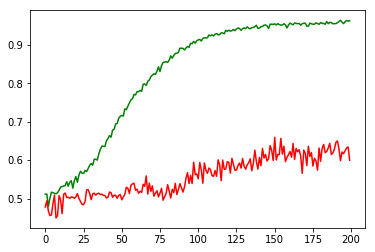

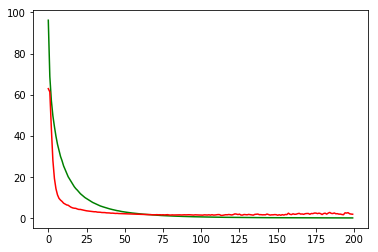

working on d,u and l,le 0.5 64 0.01 0.0001


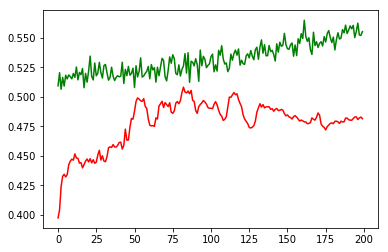

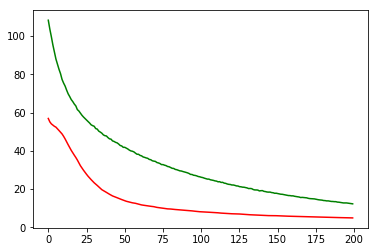

working on d,u and l,le 0.5 128 0.01 0.001


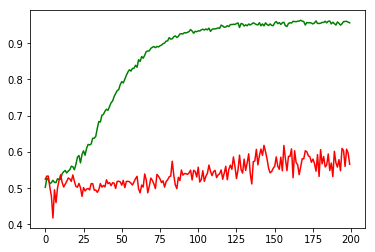

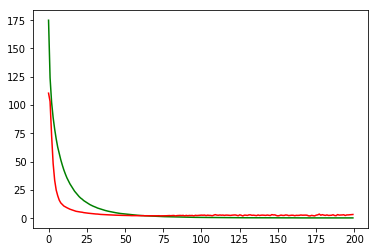

working on d,u and l,le 0.5 128 0.01 0.0001


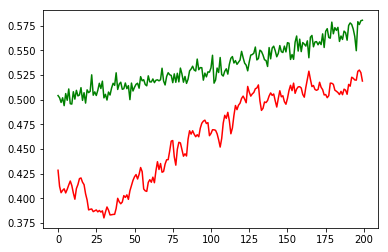

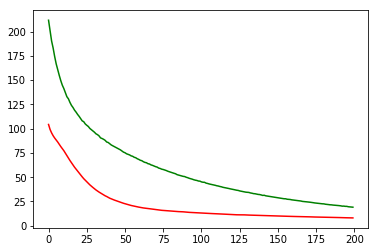

working on d,u and l,le 0.5 256 0.01 0.001


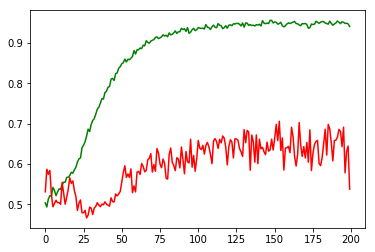

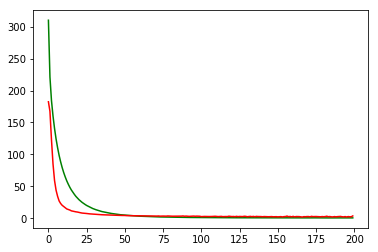

working on d,u and l,le 0.5 256 0.01 0.0001


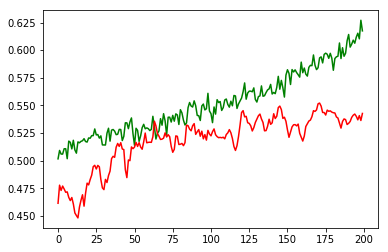

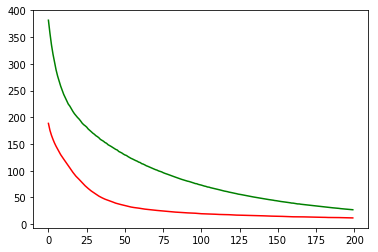

maxd,maxu,maxl,maxle: 0.5 64 0.01 0.001
Chart for BEST MODEL FOR: BKNG


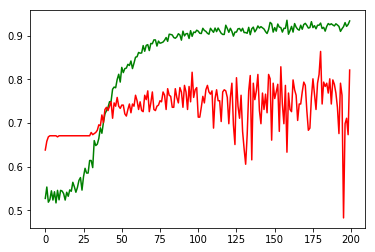

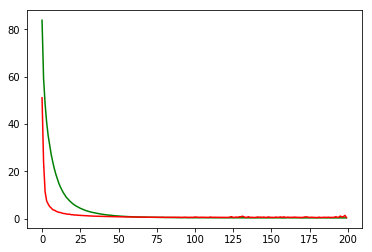

F1,score 0.8588469184890656
G-score: 0.8279366093344648
Accuracy 0.8216080393024425
Window: 140
[[111  20]
 [ 51 216]]
Vol pos 1.1907461593367403
Vol neg 1.1361536260276384
Real Percentage of gain: 228.8074220171998
Percentage of gain: 0.7756459463697281
Total gain: 308.7070866551518
000000000000000000000000000000000000000000000000
Percentile:  0
[[78 19]
 [11 64]]
172/172 [==============================] - 0s 28us/step
[0.5094830778449081, 0.8255813953488372]
Percentile:  1
[[26  0]
 [15 59]]
100/100 [==============================] - 0s 36us/step
[0.3668091917037964, 0.85]
Percentile:  2
[[ 7  0]
 [20 62]]
89/89 [==============================] - 0s 31us/step
[0.3703099616457907, 0.7752808935186836]
Percentile:  3
[[ 0  0]
 [ 4 19]]
23/23 [==============================] - 0s 26us/step
[0.28442177176475525, 0.8260869383811951]
Percentile:  4
[[ 0  0]
 [ 1 11]]
12/12 [==============================] - 0s 55us/step
[0.2024049162864685, 0.9166666865348816]
000000000000000000000000000000

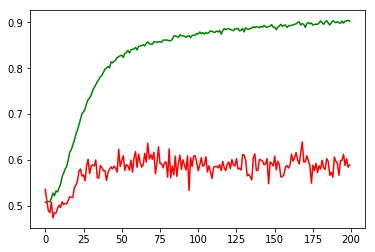

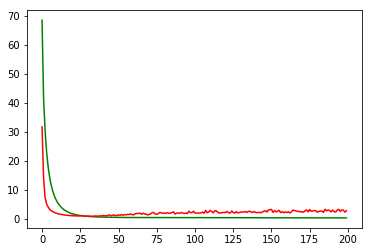

working on d,u and l,le 0.5 64 0.01 0.0001


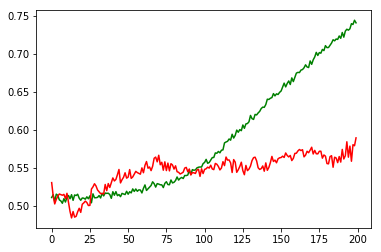

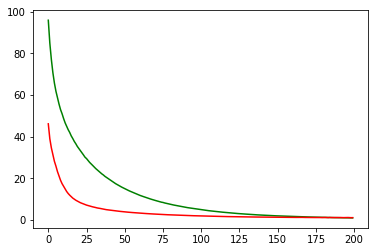

working on d,u and l,le 0.5 128 0.01 0.001


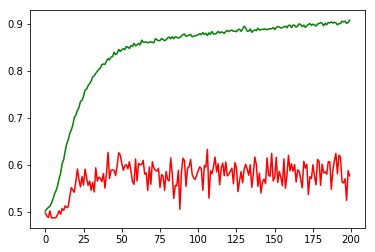

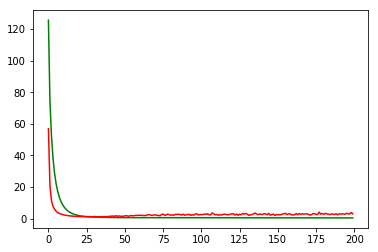

working on d,u and l,le 0.5 128 0.01 0.0001


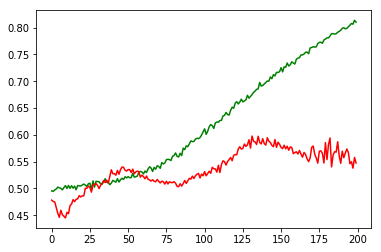

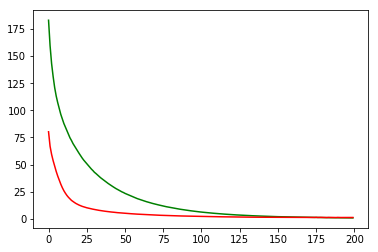

working on d,u and l,le 0.5 256 0.01 0.001


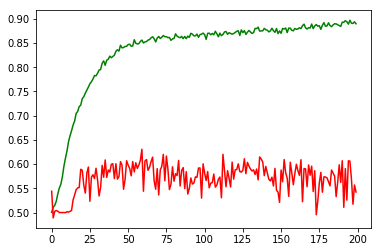

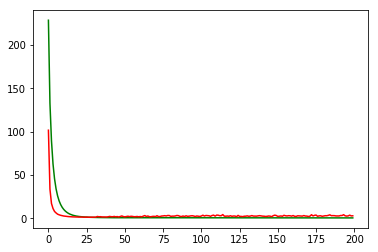

working on d,u and l,le 0.5 256 0.01 0.0001


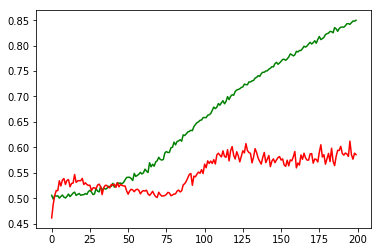

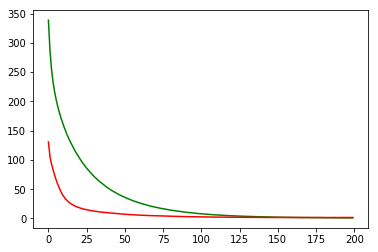

maxd,maxu,maxl,maxle: 0.5 64 0.01 0.0001
Chart for BEST MODEL FOR: ADBE


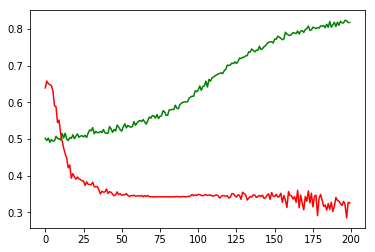

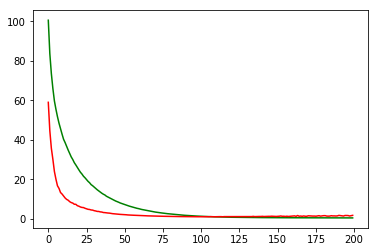

F1,score 0.153503893214683
G-score: 0.26787684344780827
Accuracy 0.32595217035236984
Window: 140
[[299  89]
 [672  69]]
Vol pos 2.015875056337258
Vol neg 2.8875059408679666
Real Percentage of gain: -240.03390625422574
Percentage of gain: -1.2892382641881415
Total gain: -1455.5500002684116
000000000000000000000000000000000000000000000000
Percentile:  0
[[195  82]
 [240  44]]
561/561 [==============================] - 0s 29us/step
[1.3302504369547448, 0.42602495543672014]
Percentile:  1
[[ 60   3]
 [242  19]]
324/324 [==============================] - 0s 30us/step
[1.9362027188878002, 0.24382716049382716]
Percentile:  2
[[ 21   4]
 [127   6]]
158/158 [==============================] - 0s 28us/step
[2.166893565202061, 0.17088607651523396]
Percentile:  3
[[23  0]
 [43  0]]
66/66 [==============================] - 0s 44us/step
[2.2815933083042954, 0.3484848484848485]
Percentile:  4
[[ 0  0]
 [18  0]]
18/18 [==============================] - 0s 45us/step
[2.9623680114746094, 0.0]
00000000000

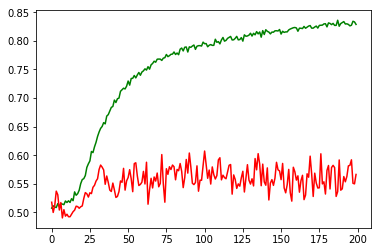

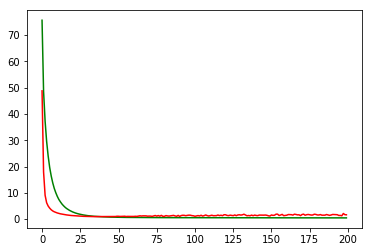

working on d,u and l,le 0.5 64 0.01 0.0001


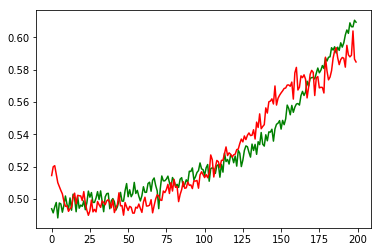

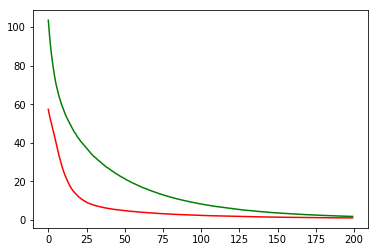

working on d,u and l,le 0.5 128 0.01 0.001


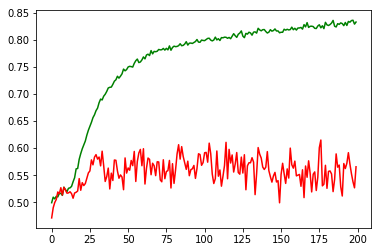

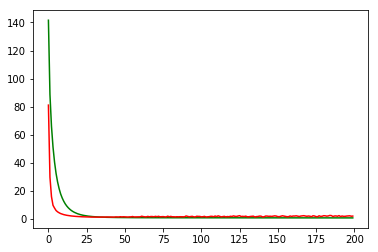

working on d,u and l,le 0.5 128 0.01 0.0001


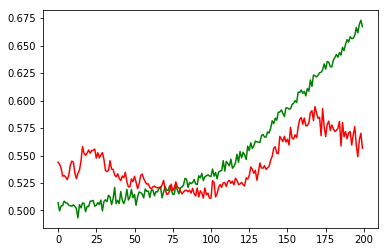

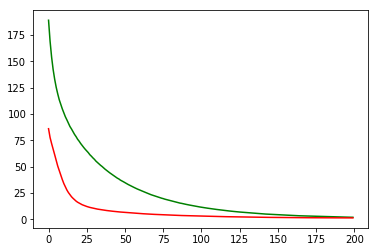

working on d,u and l,le 0.5 256 0.01 0.001


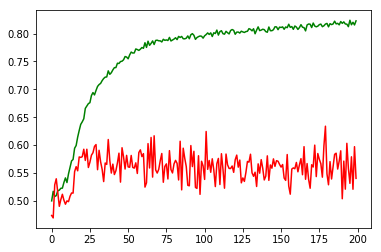

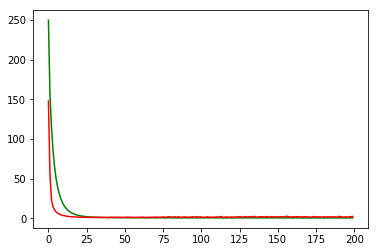

working on d,u and l,le 0.5 256 0.01 0.0001


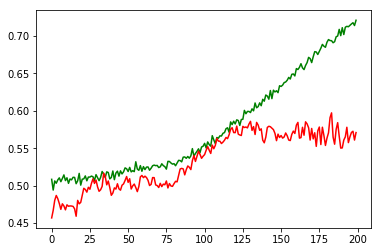

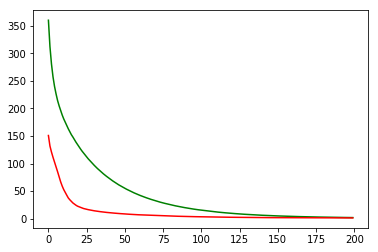

maxd,maxu,maxl,maxle: 0.5 64 0.01 0.0001
Chart for BEST MODEL FOR: AMGN


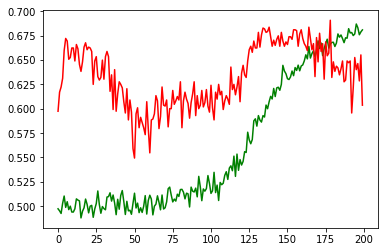

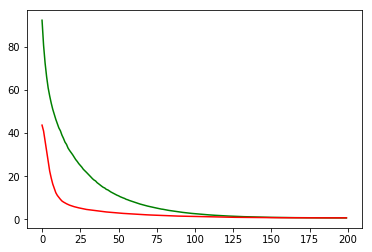

F1,score 0.7051027170311465
G-score: 0.5497933496075841
Accuracy 0.6037399824028661
Window: 140
[[146 174]
 [271 532]]
Vol pos 1.9532137060638601
Vol neg 1.897776995192163
Real Percentage of gain: 126.41820360291388
Percentage of gain: 0.42722006220016445
Total gain: 479.7681298507847
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 94  71]
 [134 147]]
446/446 [==============================] - 0s 26us/step
[0.7011620471830325, 0.5403587447955469]
Percentile:  1
[[ 26  29]
 [ 75 186]]
316/316 [==============================] - 0s 22us/step
[0.5580416797082636, 0.6708860759493671]
Percentile:  2
[[ 12  14]
 [ 50 138]]
214/214 [==============================] - 0s 27us/step
[0.5665031833069347, 0.7009345783251468]
Percentile:  3
[[10 46]
 [12 57]]
125/125 [==============================] - 0s 28us/step
[0.6846436610221863, 0.5359999976158142]
Percentile:  4
[[ 4 13]
 [ 0  3]]
20/20 [==============================] - 0s 50us/step
[0.7231981158256531, 0.3499999940395355]


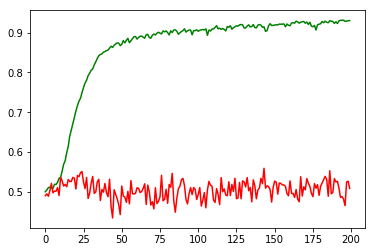

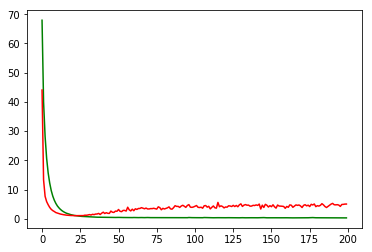

working on d,u and l,le 0.5 64 0.01 0.0001


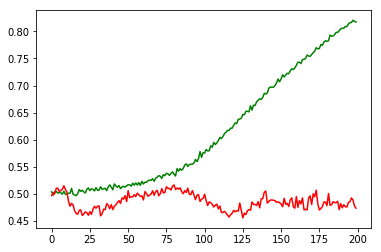

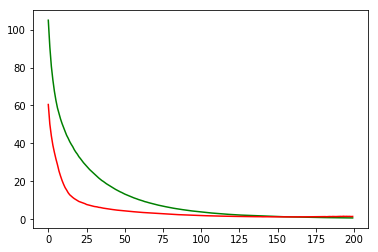

working on d,u and l,le 0.5 128 0.01 0.001


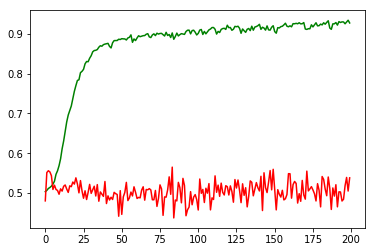

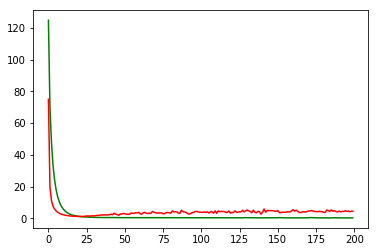

working on d,u and l,le 0.5 128 0.01 0.0001


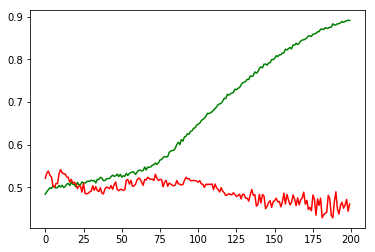

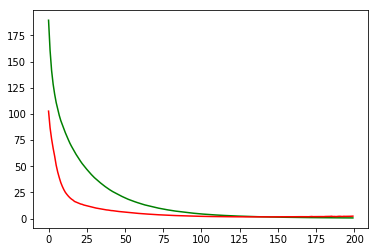

working on d,u and l,le 0.5 256 0.01 0.001


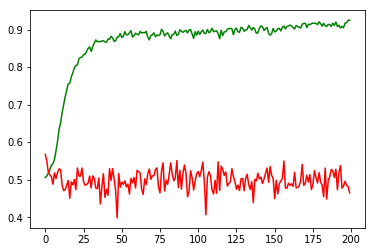

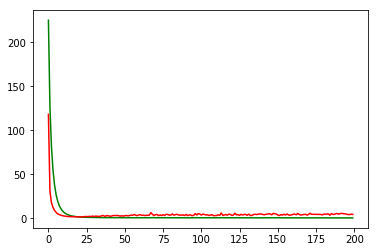

working on d,u and l,le 0.5 256 0.01 0.0001


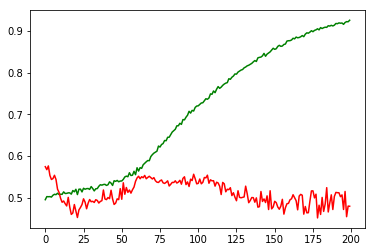

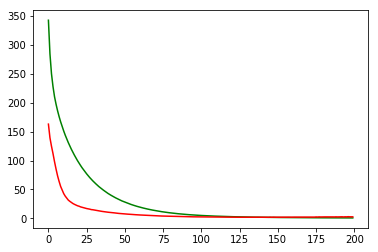

maxd,maxu,maxl,maxle: 0.5 128 0.01 0.001
Chart for BEST MODEL FOR: TXN


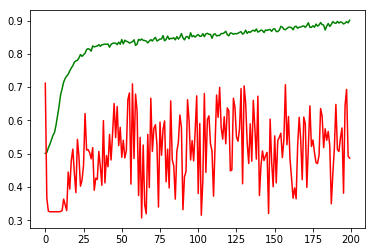

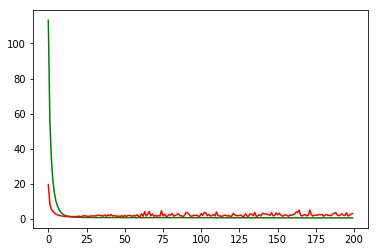

F1,score 0.5038428693424423
G-score: 0.517600777341516
Accuracy 0.48629531572605
Window: 140
[[255 113]
 [468 295]]
Vol pos 2.3157446988225363
Vol neg 2.666334455436854
Real Percentage of gain: -52.72259278262356
Percentage of gain: -0.24357270933370204
Total gain: -275.480734256417
000000000000000000000000000000000000000000000000
Percentile:  0
[[158  50]
 [153  94]]
455/455 [==============================] - 0s 40us/step
[2.2716257737233088, 0.5538461539444033]
Percentile:  1
[[ 82  47]
 [122  83]]
334/334 [==============================] - 0s 35us/step
[2.4267886677188075, 0.4940119760479042]
Percentile:  2
[[  7   7]
 [123  55]]
192/192 [==============================] - 0s 31us/step
[4.418137679497401, 0.3229166666666667]
Percentile:  3
[[ 6  4]
 [64 48]]
122/122 [==============================] - 0s 32us/step
[2.4908633544796803, 0.4426229508196721]
Percentile:  4
[[ 2  5]
 [ 6 13]]
26/26 [==============================] - 0s 27us/step
[1.2985632419586182, 0.5769230723381042]
000

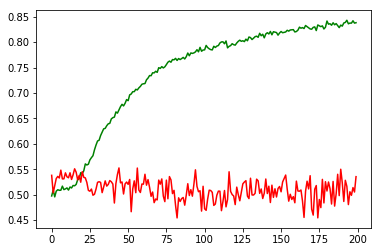

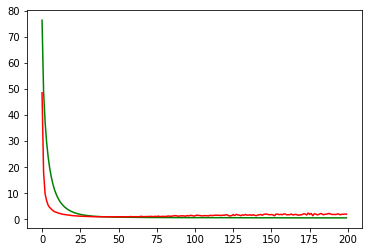

working on d,u and l,le 0.5 64 0.01 0.0001


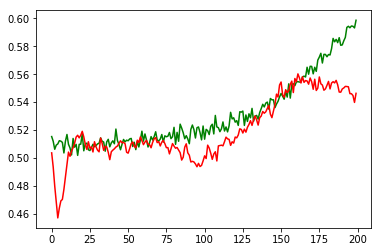

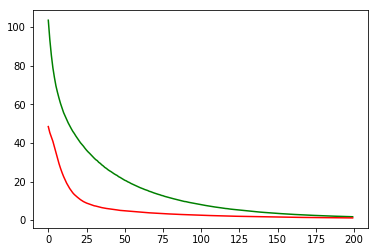

working on d,u and l,le 0.5 128 0.01 0.001


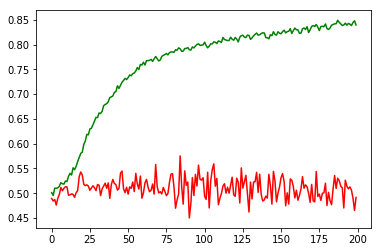

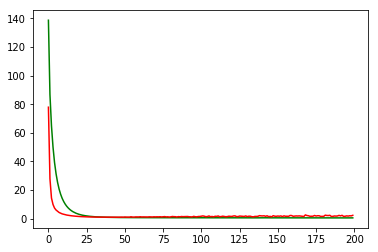

working on d,u and l,le 0.5 128 0.01 0.0001


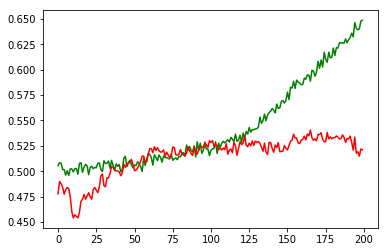

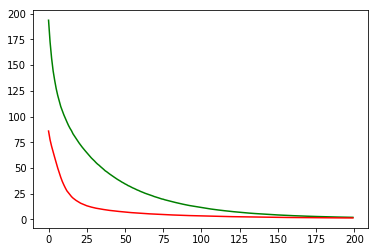

working on d,u and l,le 0.5 256 0.01 0.001


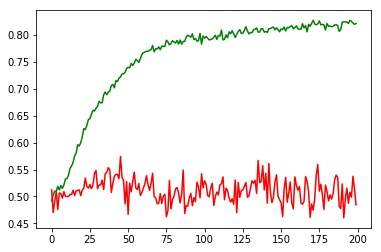

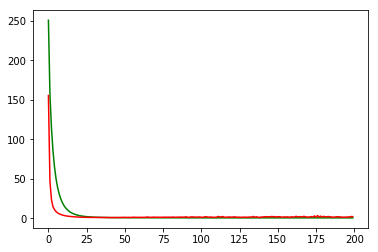

working on d,u and l,le 0.5 256 0.01 0.0001


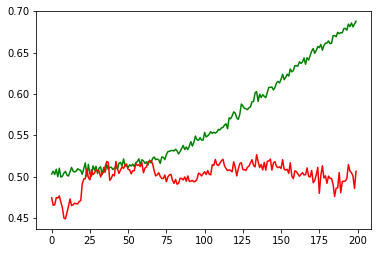

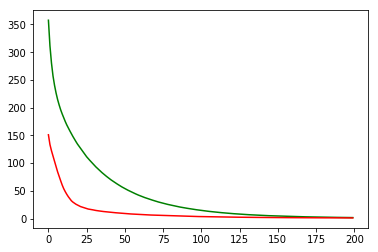

maxd,maxu,maxl,maxle: 0.5 64 0.01 0.0001
Chart for BEST MODEL FOR: AVGO


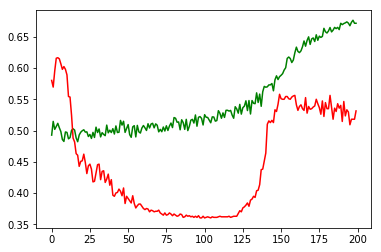

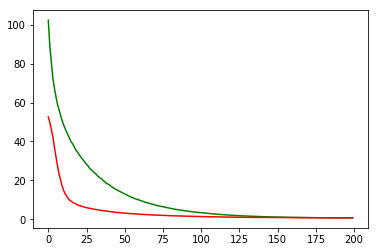

F1,score 0.5782747603833865
G-score: 0.5413745168146132
Accuracy 0.531499555815398
Window: 140
[[237 169]
 [359 362]]
Vol pos 3.755388741409403
Vol neg 2.5740441014006192
Real Percentage of gain: -24.802322497689527
Percentage of gain: 0.7900466464638027
Total gain: 890.3825705647057
000000000000000000000000000000000000000000000000
Percentile:  0
[[114  87]
 [199  75]]
475/475 [==============================] - 0s 37us/step
[0.812966844784586, 0.3978947379714564]
Percentile:  1
[[ 56  48]
 [ 44 106]]
254/254 [==============================] - 0s 32us/step
[0.6469013705028324, 0.6377952757665492]
Percentile:  2
[[ 10  28]
 [101 121]]
260/260 [==============================] - 0s 32us/step
[0.6367691324307369, 0.5038461538461538]
Percentile:  3
[[21  4]
 [15 48]]
88/88 [==============================] - 0s 35us/step
[0.4874285405332392, 0.7840909090909091]
Percentile:  4
[[35  2]
 [ 0 11]]
48/48 [==============================] - 0s 38us/step
[0.4820498426755269, 0.9583333333333334]
0000

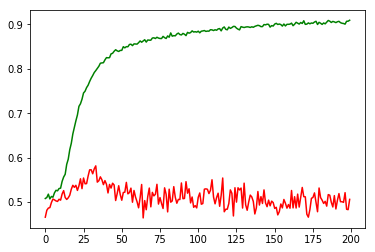

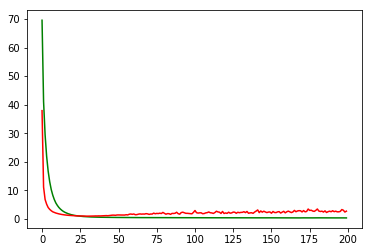

working on d,u and l,le 0.5 64 0.01 0.0001


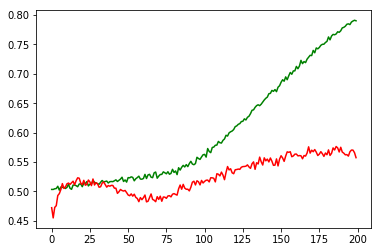

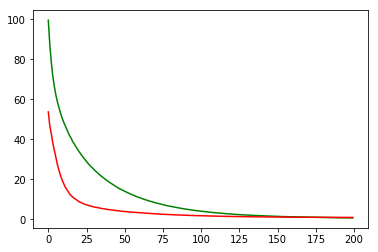

working on d,u and l,le 0.5 128 0.01 0.001


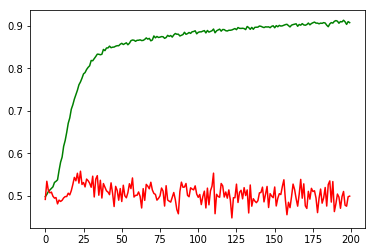

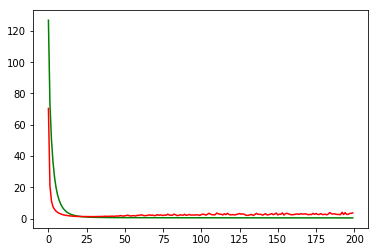

working on d,u and l,le 0.5 128 0.01 0.0001


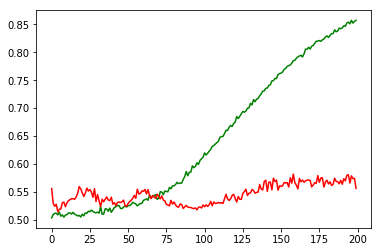

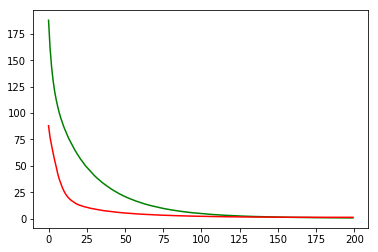

working on d,u and l,le 0.5 256 0.01 0.001


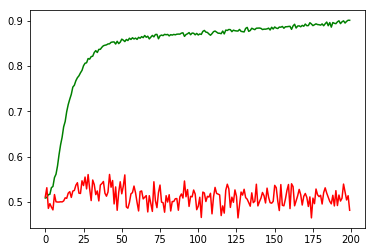

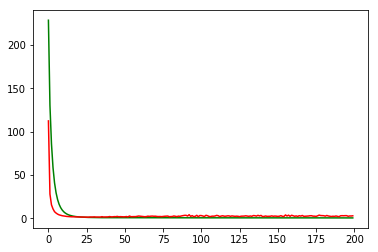

working on d,u and l,le 0.5 256 0.01 0.0001


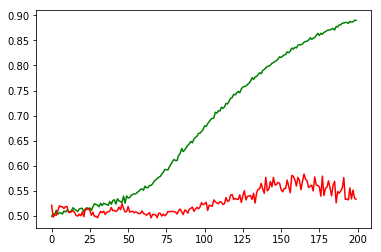

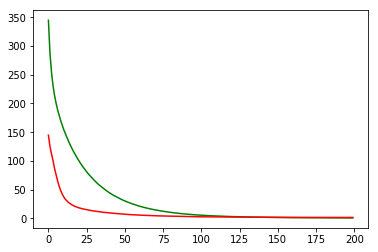

maxd,maxu,maxl,maxle: 0.5 64 0.01 0.0001
Chart for BEST MODEL FOR: PYPL


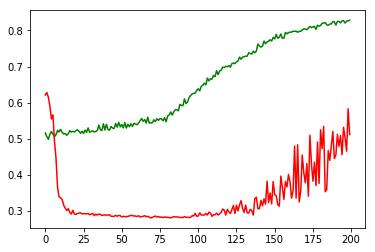

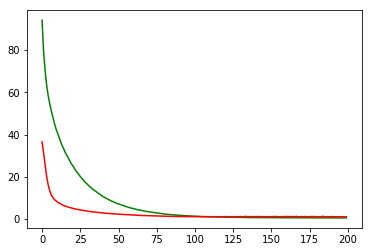

F1,score 0.6118143459915611
G-score: 0.4894009562252759
Accuracy 0.5110717467547942
Window: 140
[[142 176]
 [376 435]]
Vol pos 3.1104251237535805
Vol neg 2.70027785322699
Real Percentage of gain: -27.246957888979992
Percentage of gain: 0.26940825635475396
Total gain: 304.16192142451723
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 56  78]
 [241 204]]
579/579 [==============================] - 0s 31us/step
[1.0281853430835282, 0.44905008645872996]
Percentile:  1
[[ 13  38]
 [ 88 169]]
308/308 [==============================] - 0s 29us/step
[0.8758175411781708, 0.5909090924572635]
Percentile:  2
[[63 57]
 [17 47]]
184/184 [==============================] - 0s 33us/step
[0.9146565509879071, 0.5978260895480281]
Percentile:  3
[[10  3]
 [22  8]]
43/43 [==============================] - 0s 58us/step
[1.0791761791983316, 0.41860465462817703]
Percentile:  4
[[0 0]
 [6 6]]
12/12 [==============================] - 0s 52us/step
[0.7784029841423035, 0.5]
0000000000000000000000

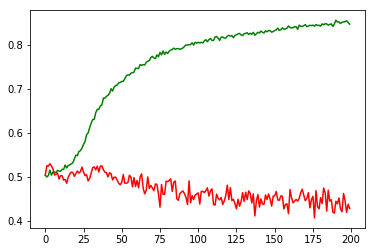

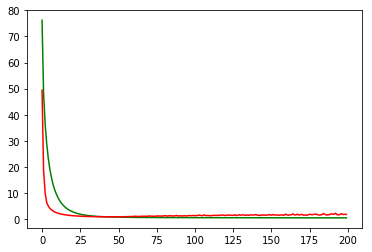

working on d,u and l,le 0.5 64 0.01 0.0001


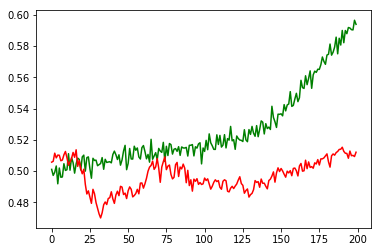

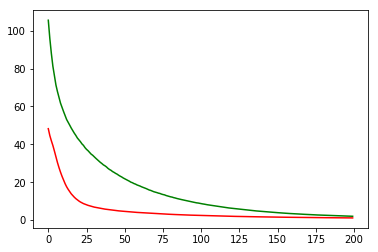

working on d,u and l,le 0.5 128 0.01 0.001


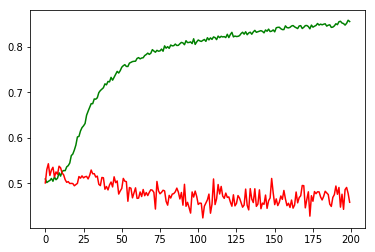

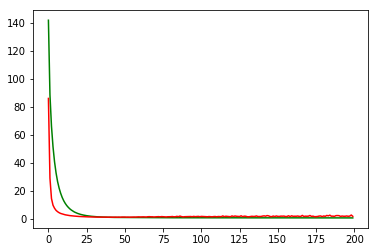

working on d,u and l,le 0.5 128 0.01 0.0001


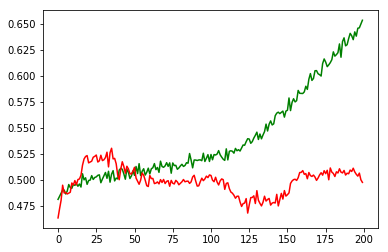

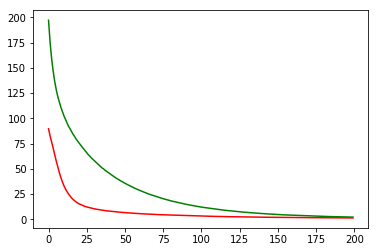

working on d,u and l,le 0.5 256 0.01 0.001


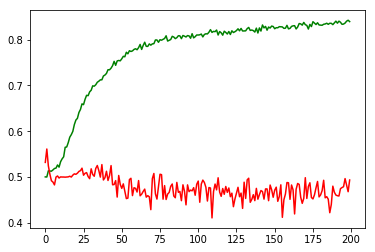

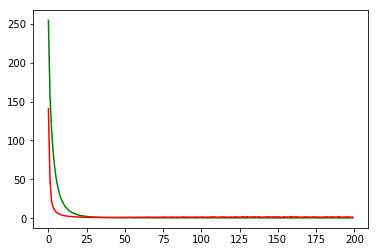

working on d,u and l,le 0.5 256 0.01 0.0001


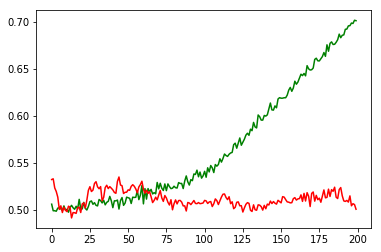

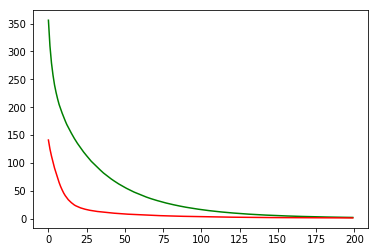

maxd,maxu,maxl,maxle: 0.5 64 0.01 0.0001
Chart for BEST MODEL FOR: GILD


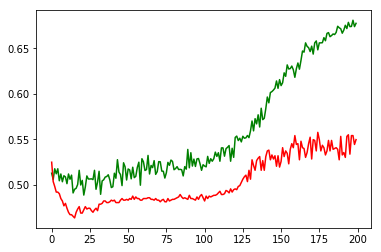

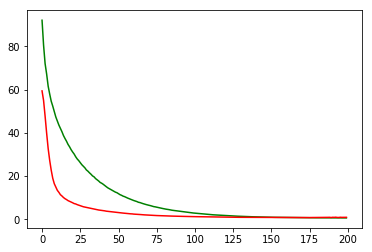

F1,score 0.6813048933500628
G-score: 0.36273333070498937
Accuracy 0.549645390282286
Window: 140
[[ 77 505]
 [  3 543]]
Vol pos 3.01136745312861
Vol neg 3.5165379375555603
Real Percentage of gain: -135.67779334597103
Percentage of gain: 0.07149516725311472
Total gain: 80.6465486615134
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 24 315]
 [  2 267]]
608/608 [==============================] - 0s 29us/step
[1.0693851160375696, 0.4786184210526316]
Percentile:  1
[[ 31  72]
 [  1 203]]
307/307 [==============================] - 0s 28us/step
[0.5694462705512777, 0.762214983713355]
Percentile:  2
[[ 0 12]
 [ 0 70]]
82/82 [==============================] - 0s 41us/step
[0.27138874370877336, 0.8536585365853658]
Percentile:  3
[[ 1 40]
 [ 0  0]]
41/41 [==============================] - 0s 66us/step
[0.8975717614336711, 0.024390243902439025]
Percentile:  4
[[21 65]
 [ 0  0]]
86/86 [==============================] - 0s 42us/step
[0.9455490209335504, 0.24418604685816653]
000000

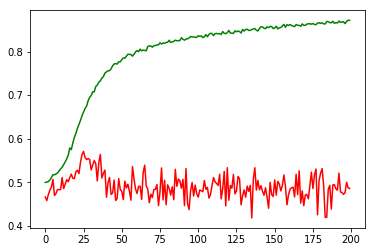

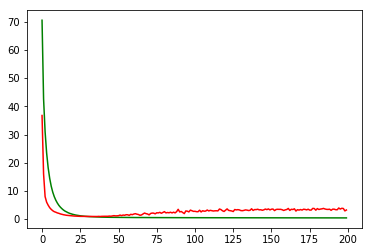

working on d,u and l,le 0.5 64 0.01 0.0001


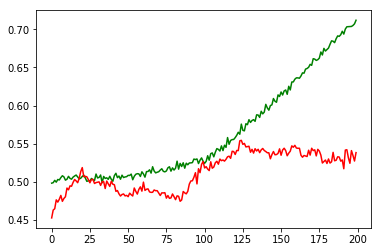

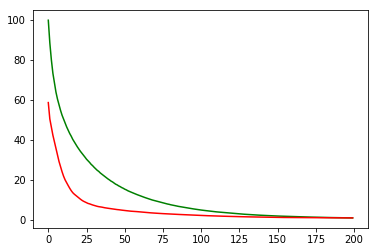

working on d,u and l,le 0.5 128 0.01 0.001


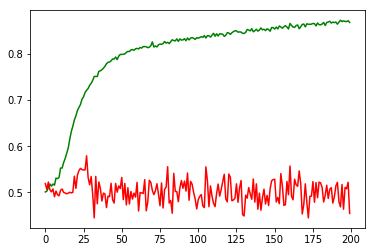

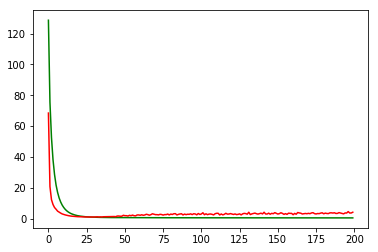

working on d,u and l,le 0.5 128 0.01 0.0001


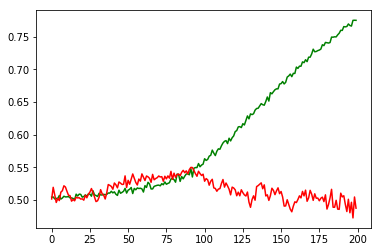

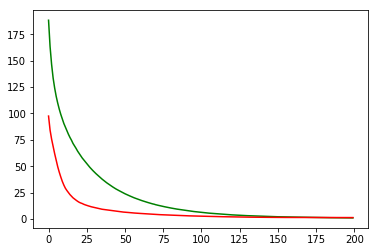

working on d,u and l,le 0.5 256 0.01 0.001


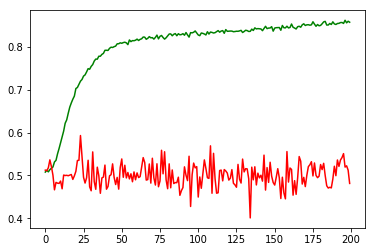

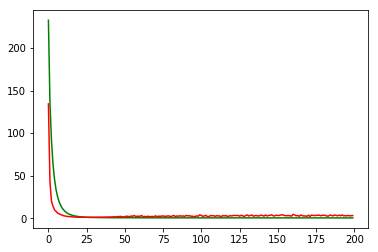

working on d,u and l,le 0.5 256 0.01 0.0001


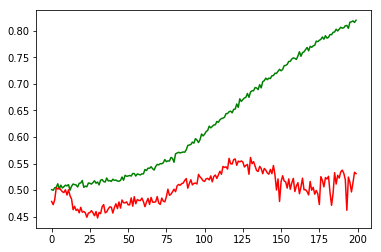

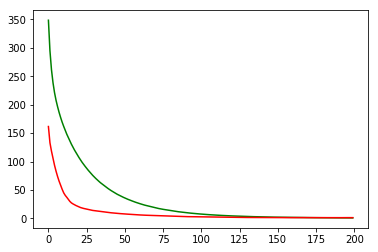

maxd,maxu,maxl,maxle: 0.5 64 0.01 0.0001
Chart for BEST MODEL FOR: COST


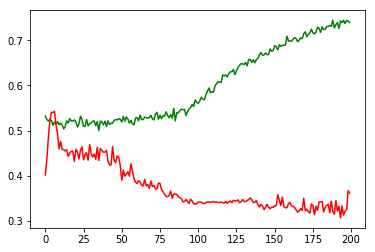

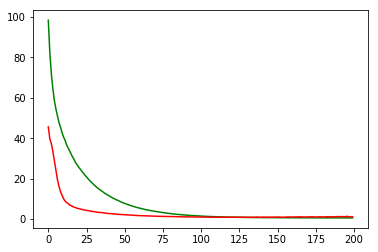

F1,score 0.2831505483549352
G-score: 0.3636241115309124
Accuracy 0.3620230703422107
Window: 140
[[266 119]
 [600 142]]
Vol pos 1.0980640833653559
Vol neg 1.5520939823401894
Real Percentage of gain: -139.2604901998195
Percentage of gain: -0.5926756231495394
Total gain: -667.9454272895309
000000000000000000000000000000000000000000000000
Percentile:  0
[[140  60]
 [131  56]]
387/387 [==============================] - 0s 34us/step
[0.9323129789465774, 0.5064599483204134]
Percentile:  1
[[ 65  39]
 [162  44]]
310/310 [==============================] - 0s 30us/step
[1.1104868388945057, 0.35161290332194295]
Percentile:  2
[[ 48  20]
 [188  17]]
273/273 [==============================] - 0s 29us/step
[1.1933307411906484, 0.23809523810888386]
Percentile:  3
[[12  0]
 [69 11]]
92/92 [==============================] - 0s 37us/step
[1.1228663714035698, 0.2500000019436297]
Percentile:  4
[[ 0  0]
 [49 14]]
63/63 [==============================] - 0s 34us/step
[0.984545386026776, 0.2222222193839058]

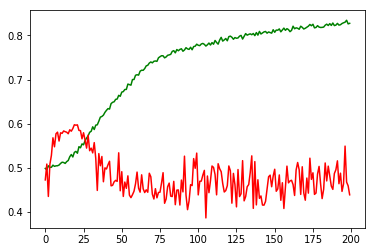

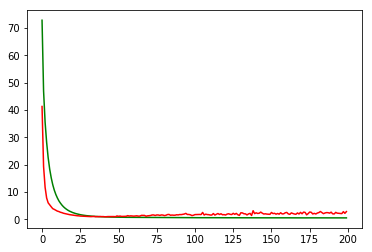

working on d,u and l,le 0.5 64 0.01 0.0001


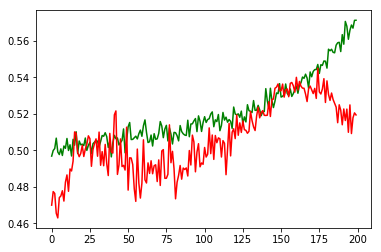

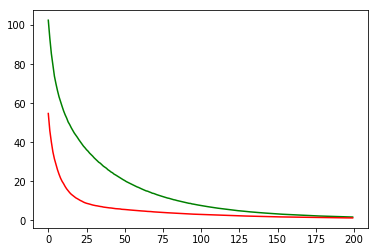

working on d,u and l,le 0.5 128 0.01 0.001


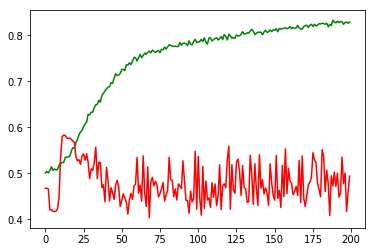

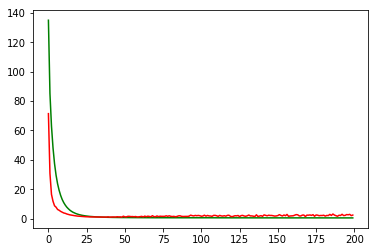

working on d,u and l,le 0.5 128 0.01 0.0001


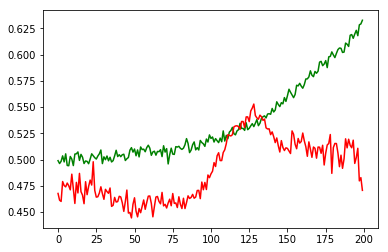

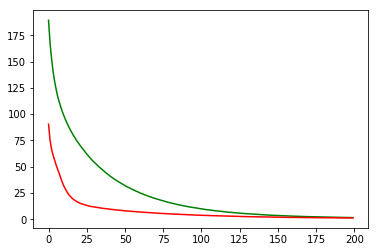

working on d,u and l,le 0.5 256 0.01 0.001


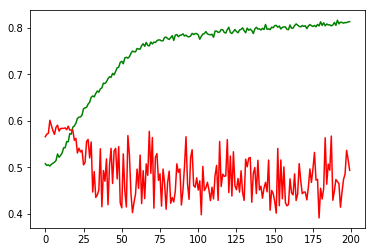

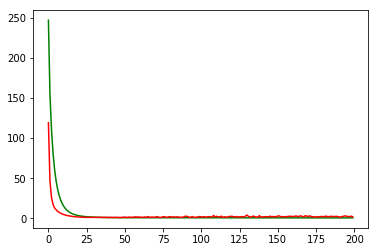

working on d,u and l,le 0.5 256 0.01 0.0001


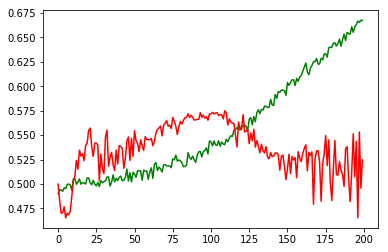

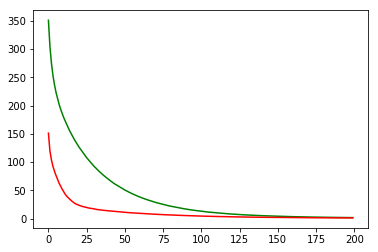

maxd,maxu,maxl,maxle: 0.5 256 0.01 0.0001
Chart for BEST MODEL FOR: QCOM


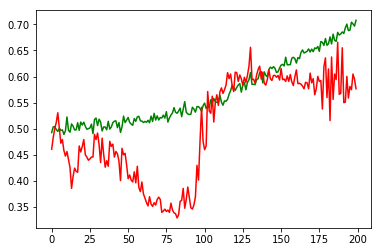

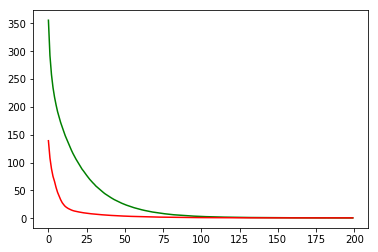

F1,score 0.7048675292667899
G-score: 0.4075660221810382
Accuracy 0.5764809911963583
Window: 140
[[ 80 275]
 [204 572]]
Vol pos 3.6629329654455165
Vol neg 2.928240150798753
Real Percentage of gain: 53.43554452466903
Percentage of gain: 0.8714458543217276
Total gain: 985.605261237874
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 43 187]
 [ 92 207]]
529/529 [==============================] - 0s 45us/step
[0.830782246274173, 0.47258979245485117]
Percentile:  1
[[  6  42]
 [ 69 227]]
344/344 [==============================] - 0s 46us/step
[0.6856454222701317, 0.6773255815686181]
Percentile:  2
[[ 1 17]
 [16 74]]
108/108 [==============================] - 0s 52us/step
[0.5726759858705379, 0.6944444444444444]
Percentile:  3
[[ 4  8]
 [25 43]]
80/80 [==============================] - 0s 63us/step
[0.7142144441604614, 0.5875]
Percentile:  4
[[25 21]
 [ 2 20]]
68/68 [==============================] - 0s 62us/step
[0.5956319202395046, 0.6617647058823529]
000000000000000000000

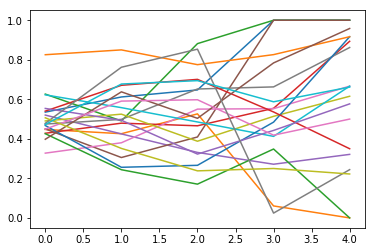

Ecco la matrice generale:
[[4175. 3301.]
 [7423. 6482.]]
Ecco le matrici per percentile
Percentile : 0
[[2409. 1873.]
 [3011. 2278.]]
Percentile : 1
[[ 870.  742.]
 [2455. 2203.]]
Percentile : 2
[[ 458.  367.]
 [1290. 1188.]]
Percentile : 3
[[398. 329.]
 [655. 518.]]
Percentile : 4
[[273. 226.]
 [239. 276.]]


In [4]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
totalconfusion=np.zeros((2,2))
confusionlist=[]
for con in range(0,5):
    confusionlist.append(np.zeros((2,2)))

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    percfinal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        percentage=[]
        
        yvolatility=[]
        yprice=[]
        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            percentage.append((100*(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open']) 
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(np.concatenate((senttemp[i],xtemp[i])))
        
        y=np.array(y)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        yvolatility=np.array(yvolatility)
       
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
            
        lspace=[0.01]
        dropspace=[0.5]
        uspace=[64,128,256]
        learnspace=[0.001,0.0001]
        bestsvm=None
        bestca=[]
        bestcl=[]
        maxacc=0
        cvacc=0
        maxu=0
        maxl=0
        maxd=0
        maxle=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for d in dropspace:
            for u in uspace:
                #print()
                for l in lspace:
                    for le in learnspace:
                    
                   
                        print('=========================================================')
                        print('working on d,u and l,le',d,u,l,le)

                        cvacclist=[]
                        #faccio cross validation
                        #start with 40% as train and 10% for validation and then i move in percentege
                        # 0-40 40-50
                        # 0-50 50-60
                        # 0-60 60-70 
                        #etc test set is completely external i do in some way error extimation changin the ticker
                        trainpoint=math.floor(len(x_tv)*0.40)
                        dimval=math.floor(trainpoint*0.25)
                        endval=trainpoint+dimval
                        
                        for i in range(0,6):
                            model=buildModel(l,u,d,le)
                            #print('-----')
                            x_train=x_tv[0:trainpoint]
                            y_train=y_tv[0:trainpoint]
                            x_val=x_tv[trainpoint:endval]
                            y_val=y_tv[trainpoint:endval]

                            trainpoint=trainpoint+dimval
                            endval=endval+dimval

                            x_train,y_train=smote(x_train,y_train)
                            if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                                x_val,y_val=smote(x_val,y_val)
                            else:
                                totu=totu+1

                            history=model.fit(x_train, y_train, epochs = 200,batch_size =128, verbose=0, validation_data=(x_val, y_val),
                                              shuffle=True)
                            prediction=model.predict(x_val, batch_size=128, verbose=0)
                            for el in range(0,len(prediction)):
                                if(prediction[el]>0.5):
                                    prediction[el]=1
                                else:
                                    prediction[el]=0



                            if(i==0):
                                meanhvl=np.asarray(history.history['val_loss'])
                                meanhva=np.asarray(history.history['val_acc'])
                                meanhl=np.asarray(history.history['loss'])
                                meanha=np.asarray(history.history['acc'])

                            else:
                                meanhvl=np.add(meanhvl,history.history['val_loss'])
                                meanhva=np.add(meanhva,history.history['val_acc'])
                                meanha=np.add(meanha,history.history['acc'])
                                meanhl=np.add(meanhl,history.history['loss'])
                            
                            #i take the last one
                            #maxAcc=history.history['val_acc'][len(history.history['val_acc'])-1]
                            #USING G SCORE AS MODEL SELECTION METRIC
                            maxAcc=history.history['val_acc'][len(history.history['val_acc'])-1]
                            cvacclist.append(maxAcc)
                            model=None
                            history=None
                            
                            del model
                            del history
                            gc.collect()
                            tf.reset_default_graph()
                            K.clear_session()

                        cvacc=sum(cvacclist)/len(cvacclist)
                        if(cvacc>maxacc):
                            maxacc=cvacc
                            maxu=u
                            maxl=l
                            maxle=le
                            maxd=d


                        meanhvl=meanhvl/6
                        meanhva=meanhva/6
                        meanhl=meanhl/6
                        meanha=meanha/6

                        plt.plot(meanha,'g')
                        plt.plot(meanhva,'r')
                        plt.show()
                        plt.plot(meanhl,'g')
                        plt.plot(meanhvl,'r')
                        plt.show()

                        print('=========================================================')
        model=buildModel(maxl,maxu,maxd,maxle)
        x_tv,y_tv=smote(x_tv,y_tv)
        history=model.fit(x_tv, y_tv, epochs =200,batch_size =128, verbose=0, validation_data=(x_test, y_test),
                                          shuffle=True)
        prediction=model.predict(x_test, batch_size=128, verbose=0)
        for el in range(0,len(prediction)):
            if(prediction[el]>0.5):
                prediction[el]=1
            else:
                prediction[el]=0
            
        
        
        print('=========================================================')
        print('=========================================================')
        print('=========================================================')
        print('=========================================================')
        print('maxd,maxu,maxl,maxle:',maxd,maxu,maxl,maxle)
        print('Chart for BEST MODEL FOR:',files[o-1])
        plt.plot(history.history['acc'],'g')
        plt.plot(history.history['val_acc'],'r')
        plt.show()
        plt.plot(history.history['loss'],'g')
        plt.plot(history.history['val_loss'],'r')
        plt.show()
        acctotal.append(history.history['val_acc'][len(history.history['val_acc'])-1])
        confmatrix=confusion_matrix(y_test, prediction)
        totalconfusion=totalconfusion+confmatrix
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=history.history['val_acc'][len(history.history['val_acc'])-1]
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        #plt.plot(chart)
        #plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=model.predict(x_test[distribution[g]])
                for el in range(0,len(predictionp)):
                    if(predictionp[el]>0.5):
                        predictionp[el]=1
                    else:
                        predictionp[el]=0
                tempmatrix=confusion_matrix(y_test[distribution[g]], predictionp)
                confusionlist[g]=confusionlist[g]+tempmatrix
                print(tempmatrix)
                print(model.evaluate(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=model.evaluate(x_test[distribution[g]],y_test[distribution[g]], verbose=0)
            chartscore.append(tempscore[1])    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
        del model
        del history
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
print('Ecco la matrice generale:')
print(totalconfusion)
print('Ecco le matrici per percentile')
for i in range(0,len(confusionlist)):
    print('Percentile :',i)
    print(confusionlist[i])        

            

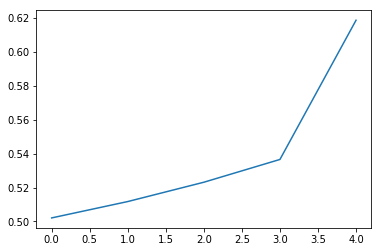

In [5]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/len(chartlist)
plt.plot(tot)
plt.show()

In [6]:
print(tot)

[0.50206605 0.51171885 0.52311172 0.53653971 0.61862976]


In [7]:
for percentile in range(0,5):
    print('Percentile :',percentile)
    print(sum(percentilepos[percentile])/countpos[percentile])
    print(sum(percentileneg[percentile])/countneg[percentile])

Percentile : 0


NameError: name 'percentilepos' is not defined

In [ ]:
print(np.argwhere(res==1))

In [ ]:
print(res)

In [ ]:
print(len(res))

In [ ]:
print(len(res[len(res)-1]))

In [ ]:
print(truepositive[:,0])